In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/JPY_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74262, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,108.730,108.728,108.590,108.759
2020-01-01 17:15:00,108.728,108.703,108.575,108.735
2020-01-01 17:30:00,108.703,108.668,108.660,108.703
2020-01-01 17:45:00,108.668,108.677,108.668,108.677
2020-01-01 18:00:00,108.677,108.658,108.601,108.678


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74261, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,108.730,108.728,108.590,108.759,108.703,17,2,1,0.002,108.6745,0.169,108.70175
2020-01-01 17:15:00,108.728,108.703,108.575,108.735,108.668,17,2,1,0.025,108.6550,0.160,108.68525
2020-01-01 17:30:00,108.703,108.668,108.660,108.703,108.677,17,2,1,0.035,108.6815,0.043,108.68350
2020-01-01 17:45:00,108.668,108.677,108.668,108.677,108.658,17,2,1,-0.009,108.6725,0.009,108.67250
2020-01-01 18:00:00,108.677,108.658,108.601,108.678,108.692,18,2,1,0.019,108.6395,0.077,108.65350


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,108.730,108.728,108.590,108.759,108.703,17,2,1,0.002,108.6745,0.169,108.70175,-22.367514
2020-01-01 17:15:00,108.728,108.703,108.575,108.735,108.668,17,2,1,0.025,108.6550,0.160,108.68525,-22.417688
2020-01-01 17:30:00,108.703,108.668,108.660,108.703,108.677,17,2,1,0.035,108.6815,0.043,108.68350,-22.407764
2020-01-01 17:45:00,108.668,108.677,108.668,108.677,108.658,17,2,1,-0.009,108.6725,0.009,108.67250,-22.438913
2020-01-01 18:00:00,108.677,108.658,108.601,108.678,108.692,18,2,1,0.019,108.6395,0.077,108.65350,-22.474230


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  108.730  108.590  108.759         108.703    17    2   
2020-01-01 17:15:00  108.728  108.575  108.735         108.668    17    2   
2020-01-01 17:30:00  108.703  108.660  108.703         108.677    17    2   
2020-01-01 17:45:00  108.668  108.668  108.677         108.658    17    2   
2020-01-01 18:00:00  108.677  108.601  108.678         108.692    18    2   

                     week  momentum  avg_price  range  ohlc_price        pca  
timestamp                                                                     
2020-01-01 17:00:00     1     0.002   108.6745  0.169   108.70175 -22.367514  
2020-01-01 17:15:00     1     0.025   108.6550  0.160   108.68525 -22.417688  
2020-01-01 17:30:00     1     0.035   108.6815  0.043   108.68350 -22.407764  
2020-01-01 17:45:00     1    -0.009   108.6725  0.009   108.67250

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59408
59408
7500
7500
7353
7353


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(59408, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59383, 24, 12)
(7475, 24, 12)
(7328, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59383, 1)
(7475, 1)
(7328, 1)


array([[0.24607372],
       [0.24640799],
       [0.24650812],
       ...,
       [0.8833792 ],
       [0.8856847 ],
       [0.88708854]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.24607372, 0.24640799, 0.24650812, ..., 0.8833792 , 0.8856847 ,
       0.88708854], dtype=float32)

In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY15minGRU.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 547.0141 - mae: 9.9996 - mse: 547.0141 - root_mean_squared_error: 23.3883 - mape: 218431.8281 
Epoch 1: val_mse improved from inf to 4.05384, saving model to /content/drive/MyDrive/modelweights/JPY15minGRU.hdf5
464/464 [==============================] - 110s 223ms/step - loss: 547.0141 - mae: 9.9996 - mse: 547.0141 - root_mean_squared_error: 23.3883 - mape: 218431.8281 - val_loss: 4.0538 - val_mae: 2.0047 - val_mse: 4.0538 - val_root_mean_squared_error: 2.0134 - val_mape: 331017.9375
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 2.4617 - mae: 1.5233 - mse: 2.4617 - root_mean_squared_error: 1.5690 - mape: 24315.8770
Epoch 2: val_mse improved from 4.05384 to 0.80983, saving model to /content/drive/MyDrive/modelweights/JPY15minGRU.hdf5
464/464 [==============================] - 100s 216ms/step - loss: 2.4617 - mae: 1.5233 - mse: 2.4617 - root_mean_squared_error: 1.5690 - mape: 24315.8770 - val_lo

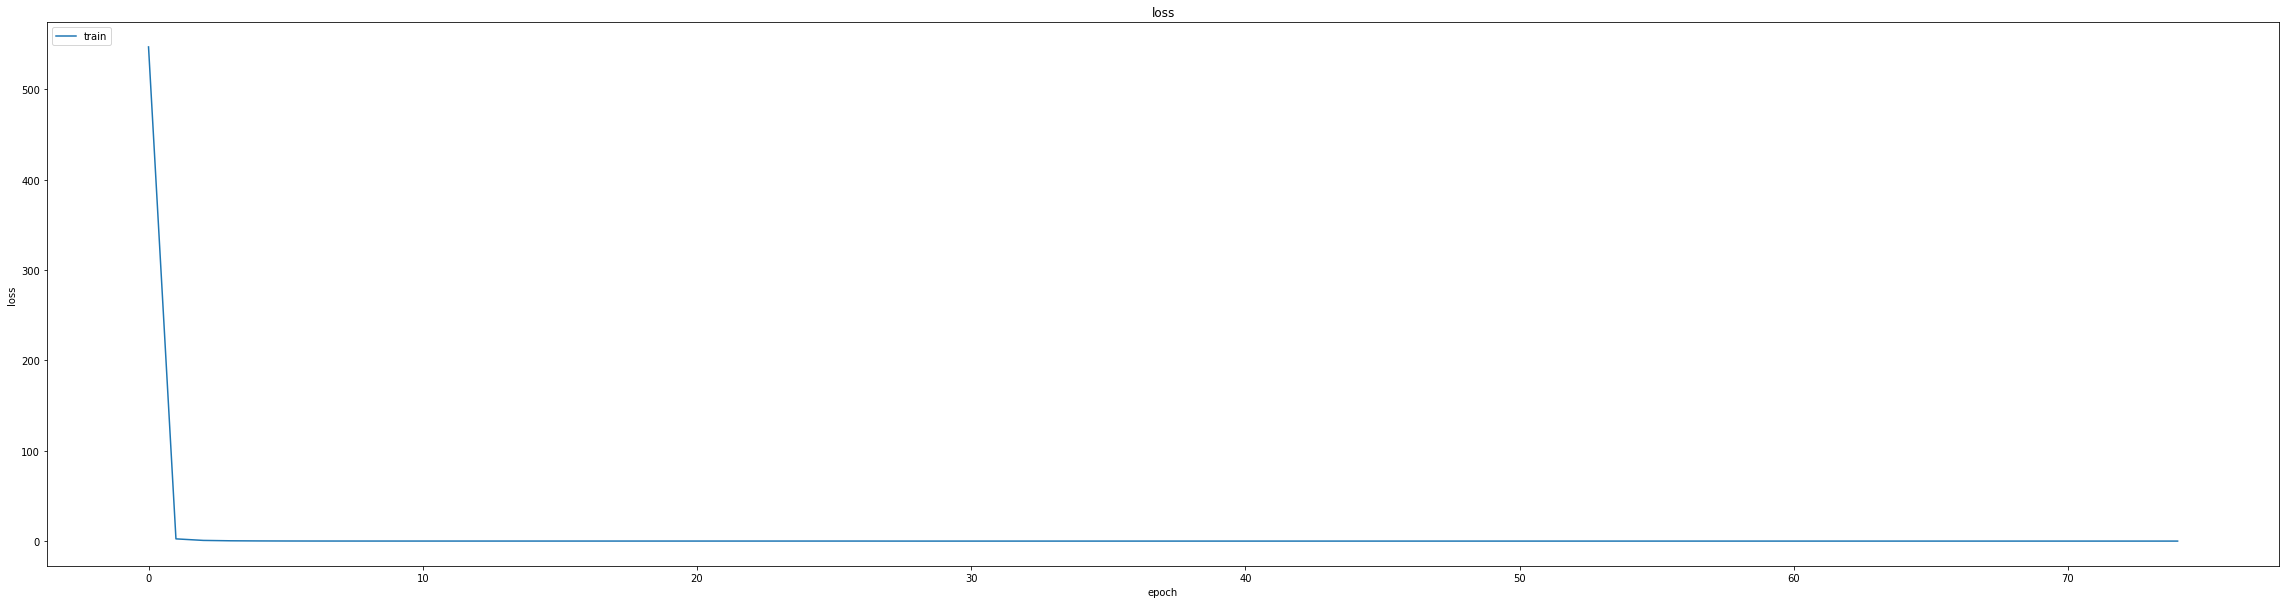

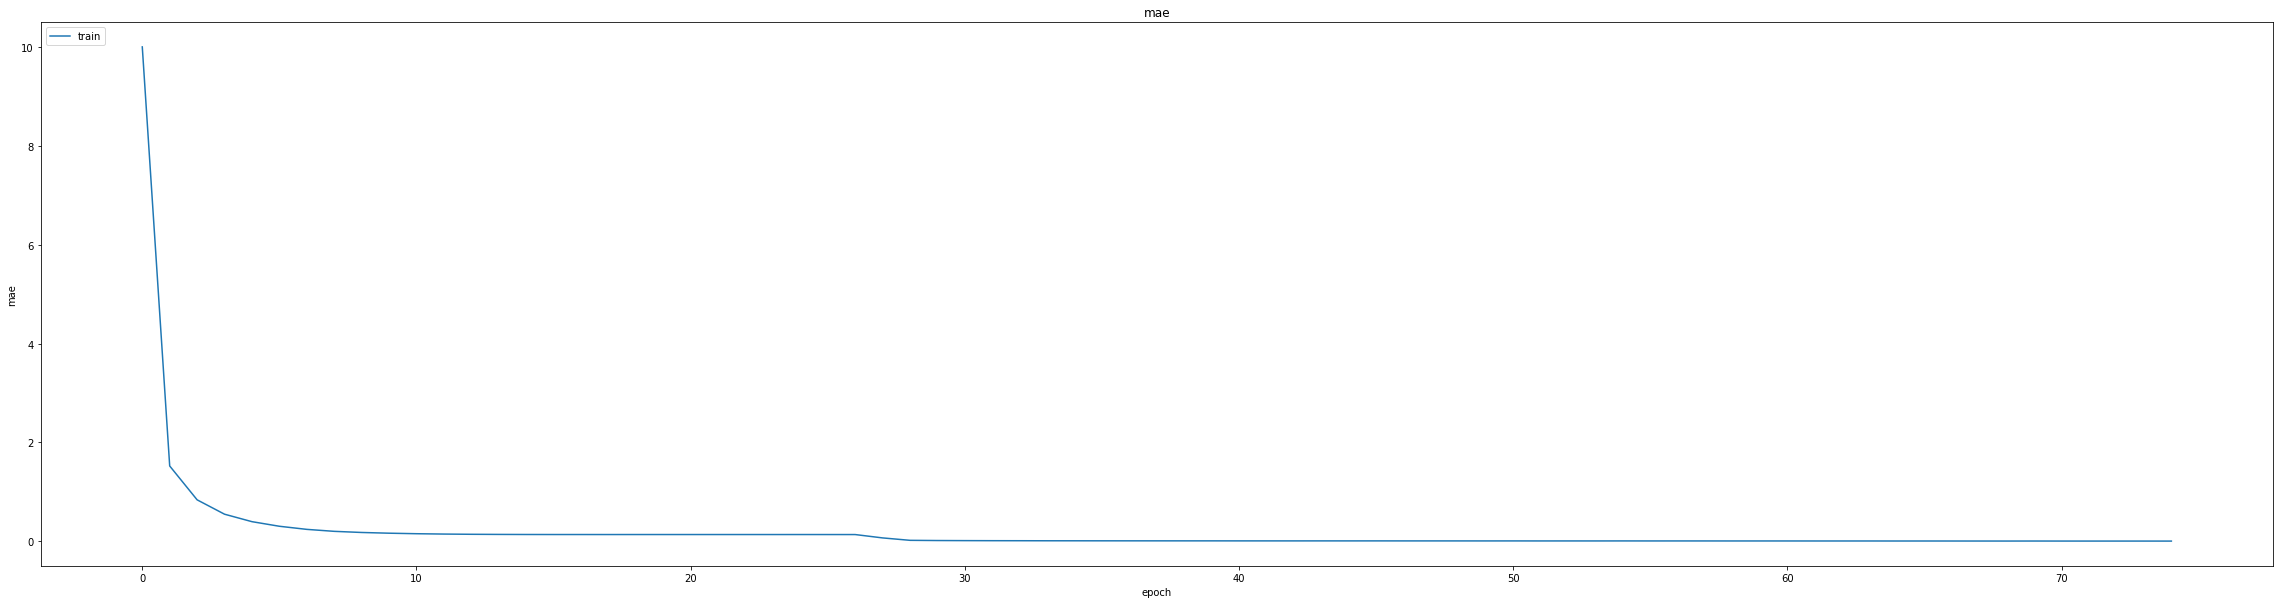

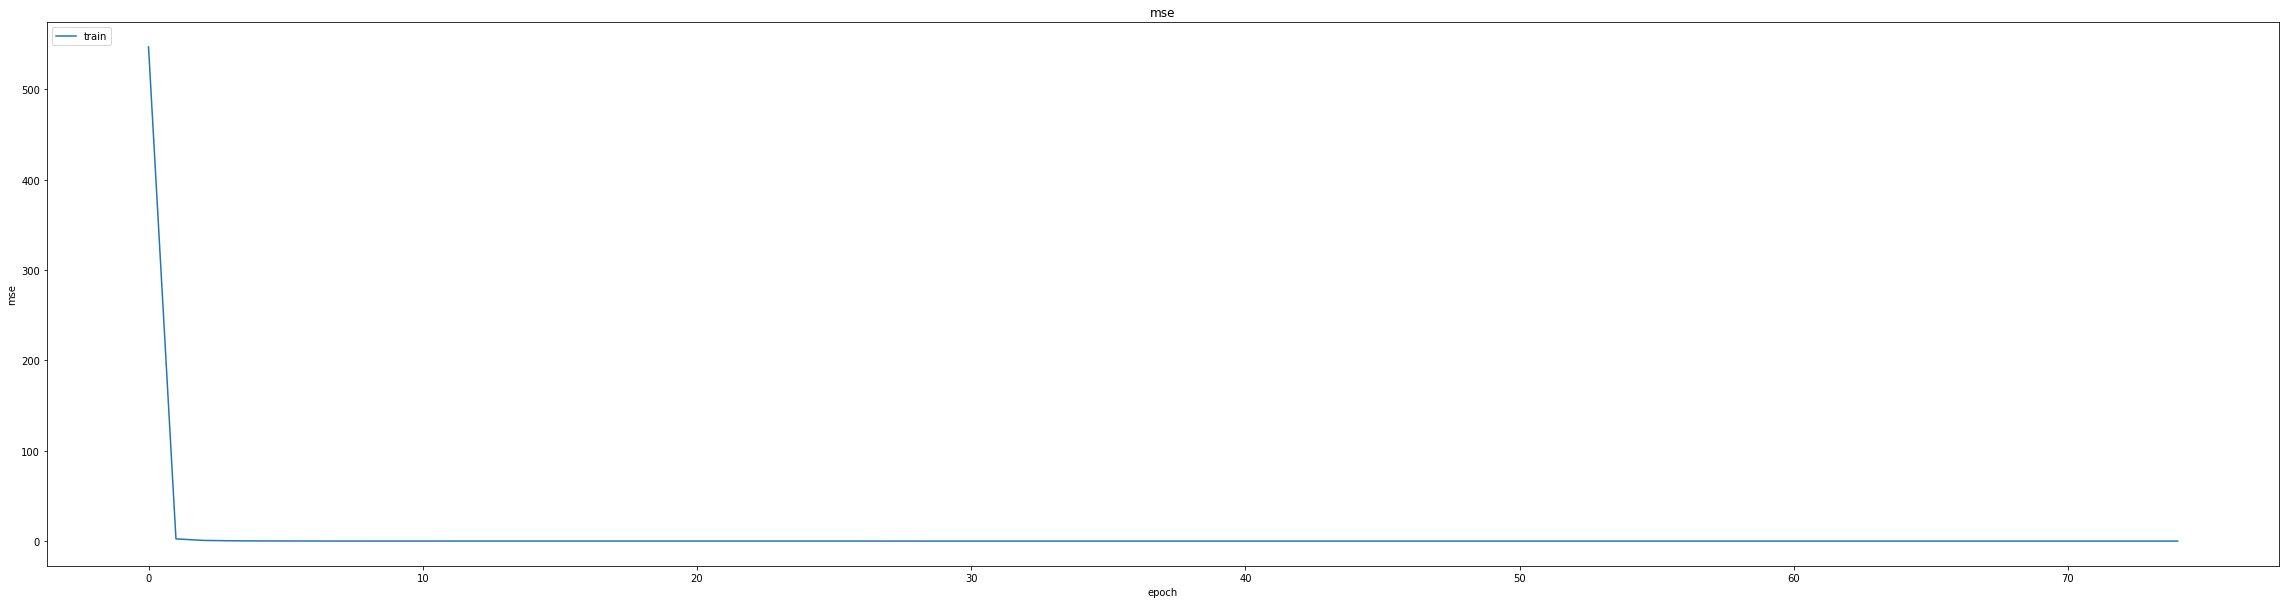

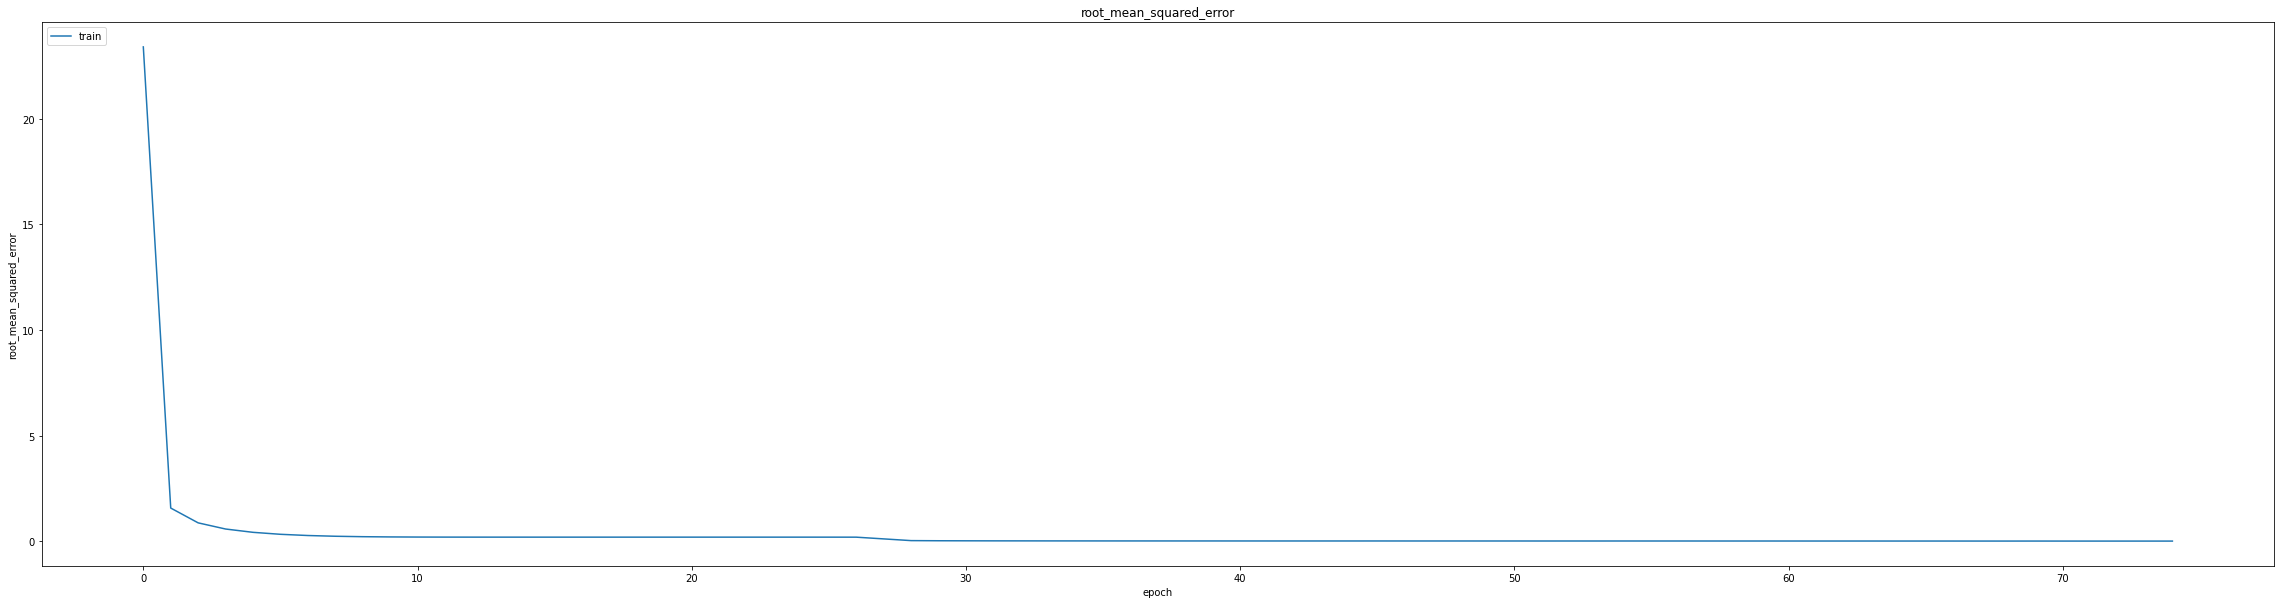

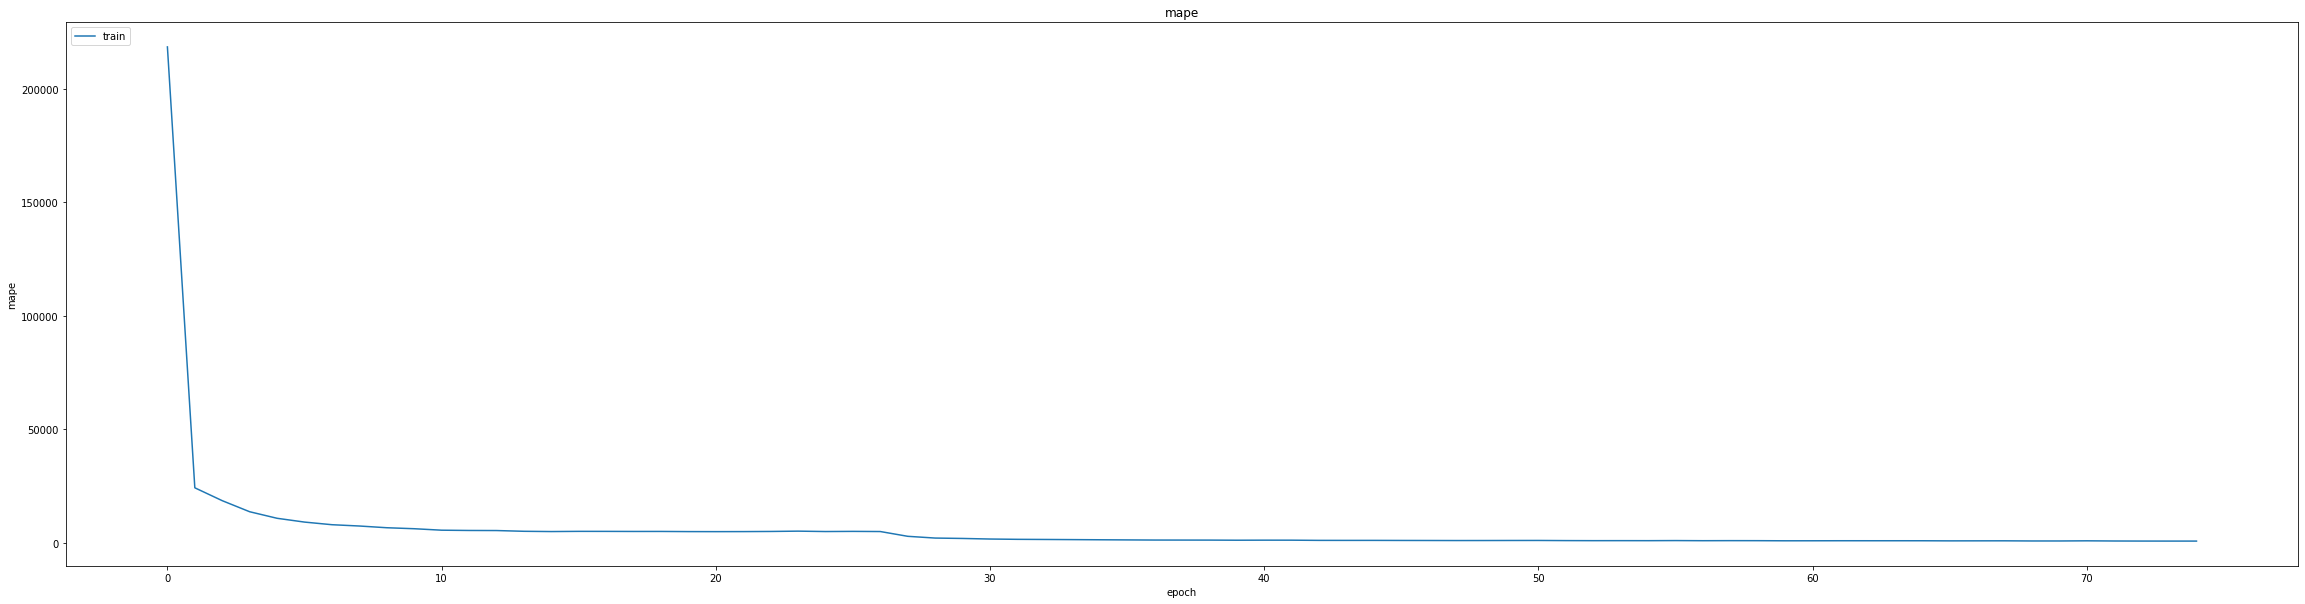

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01569126732647419
0.02132599987089634
234/234 [==============================] - 8s 28ms/step
0.9650758434175942


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY15minGRU.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 1.0831e-04 - mae: 0.0062 - mse: 1.0831e-04 - root_mean_squared_error: 0.0104 - mape: 982.2752
Epoch 1: val_mse did not improve from 0.00045
464/464 [==============================] - 115s 235ms/step - loss: 1.0831e-04 - mae: 0.0062 - mse: 1.0831e-04 - root_mean_squared_error: 0.0104 - mape: 982.2752 - val_loss: 5.8195e-04 - val_mae: 0.0197 - val_mse: 5.8195e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 10371.6191 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 4.5944e-05 - mae: 0.0049 - mse: 4.5944e-05 - root_mean_squared_error: 0.0068 - mape: 987.6149
Epoch 2: val_mse did not improve from 0.00045
464/464 [==============================] - 112s 241ms/step - loss: 4.5944e-05 - mae: 0.0049 - mse: 4.5944e-05 - root_mean_squared_error: 0.0068 - mape: 987.6149 - val_loss: 5.6988e-04 - val_mae: 0.0199 - val_mse: 5.6988e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 9830.083

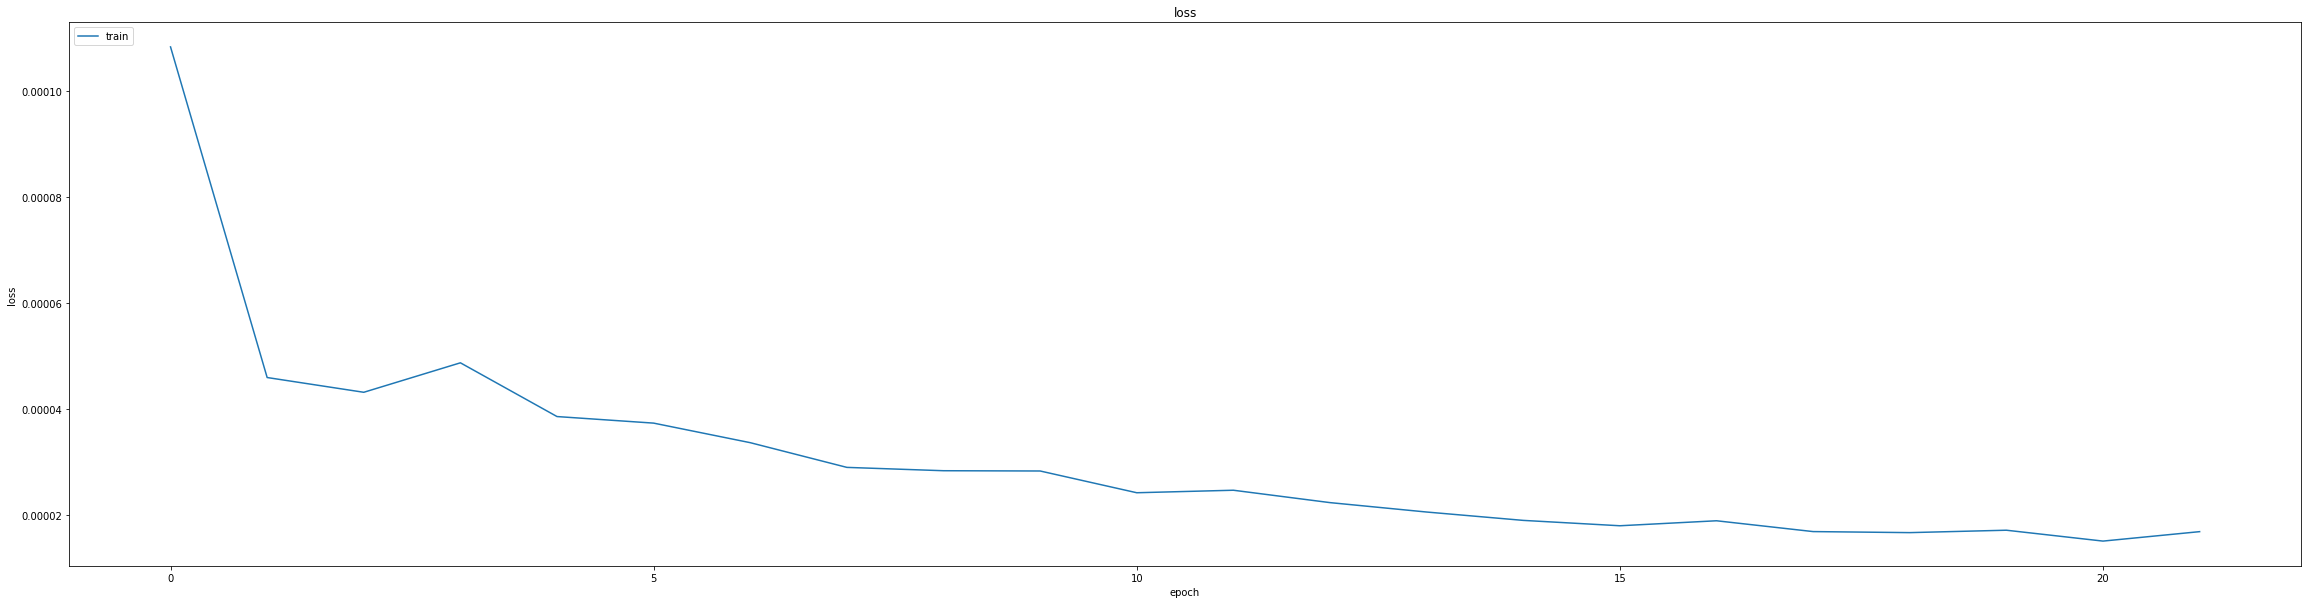

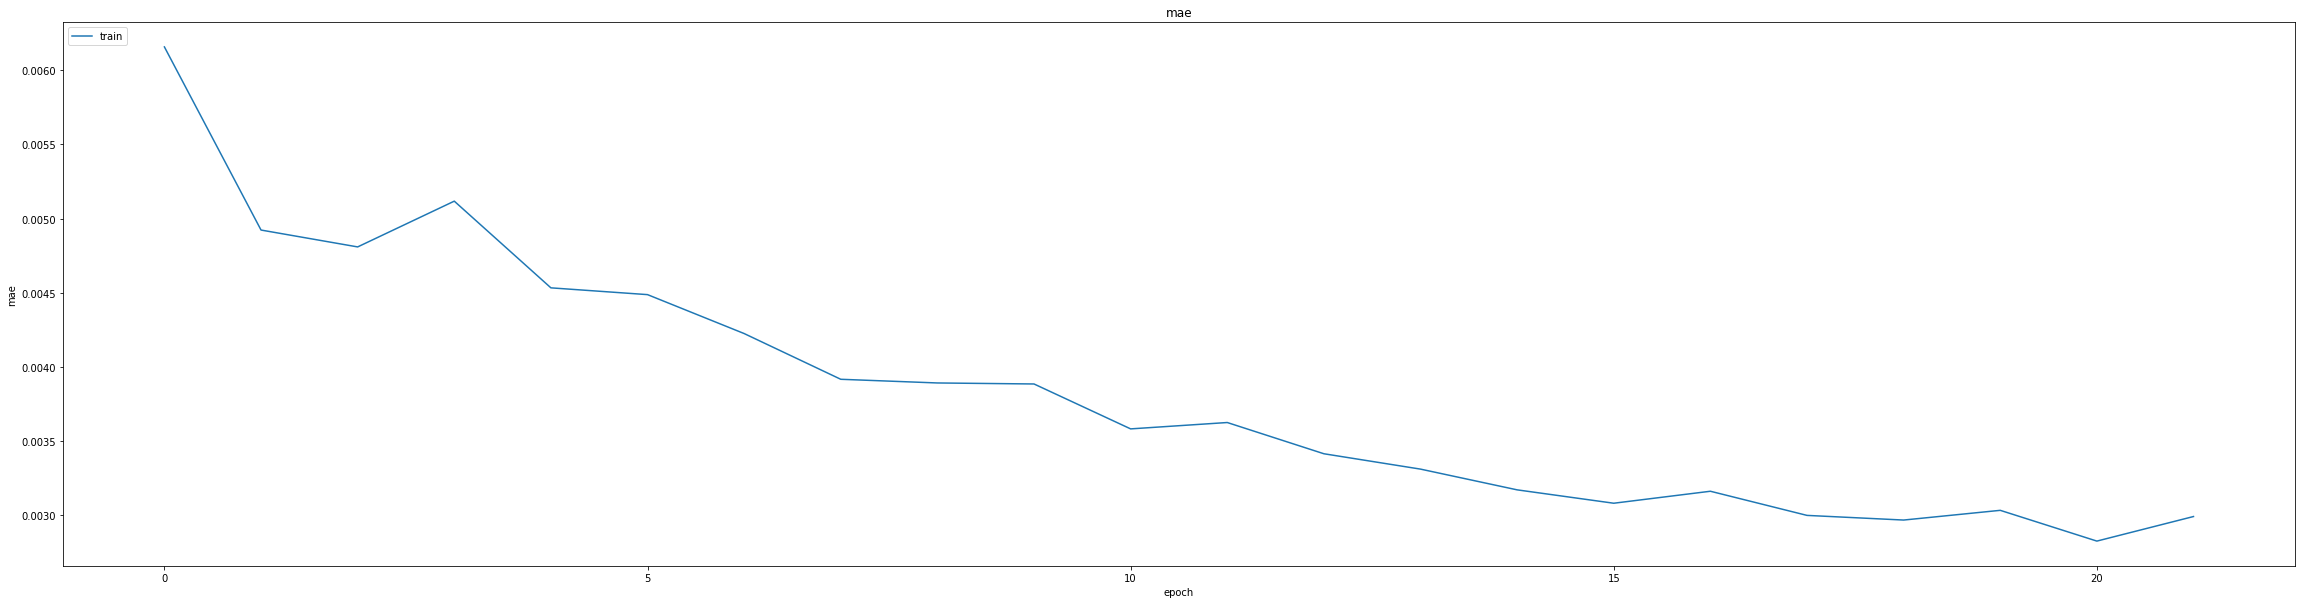

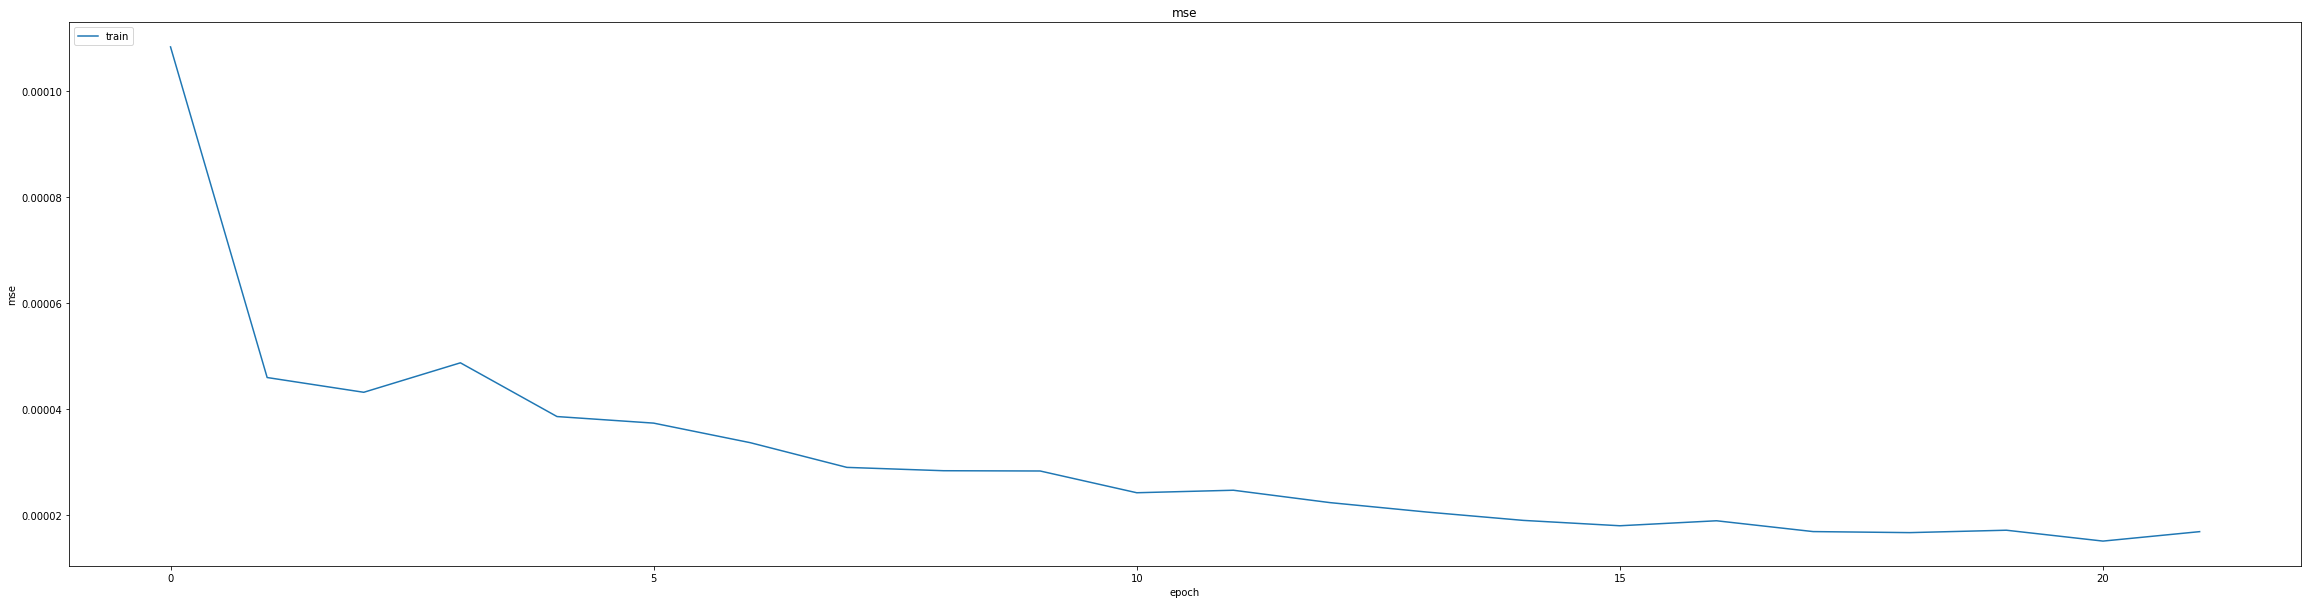

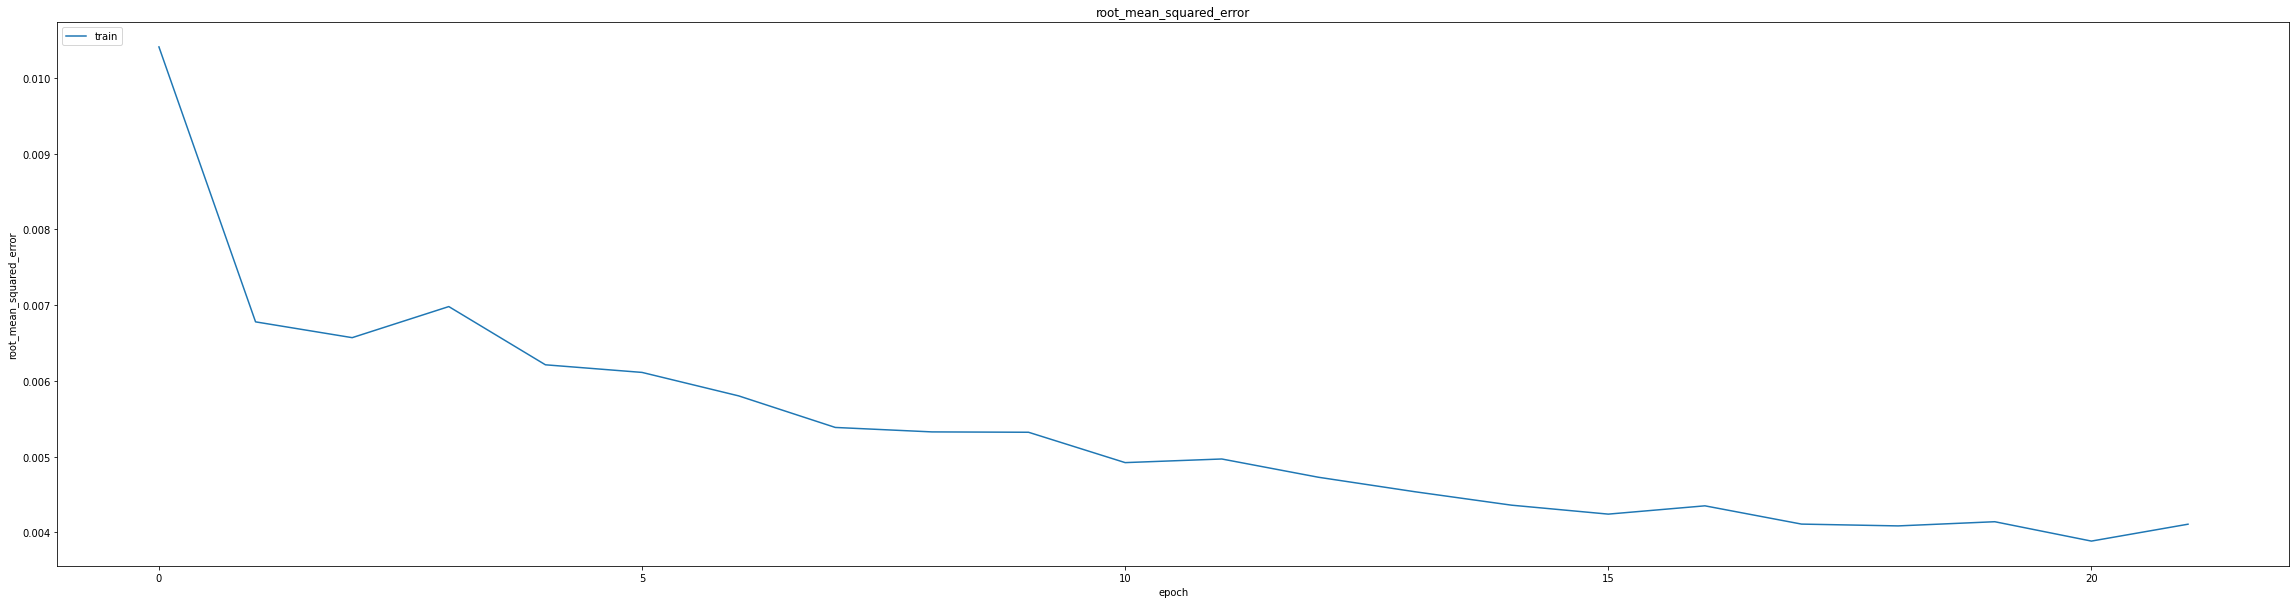

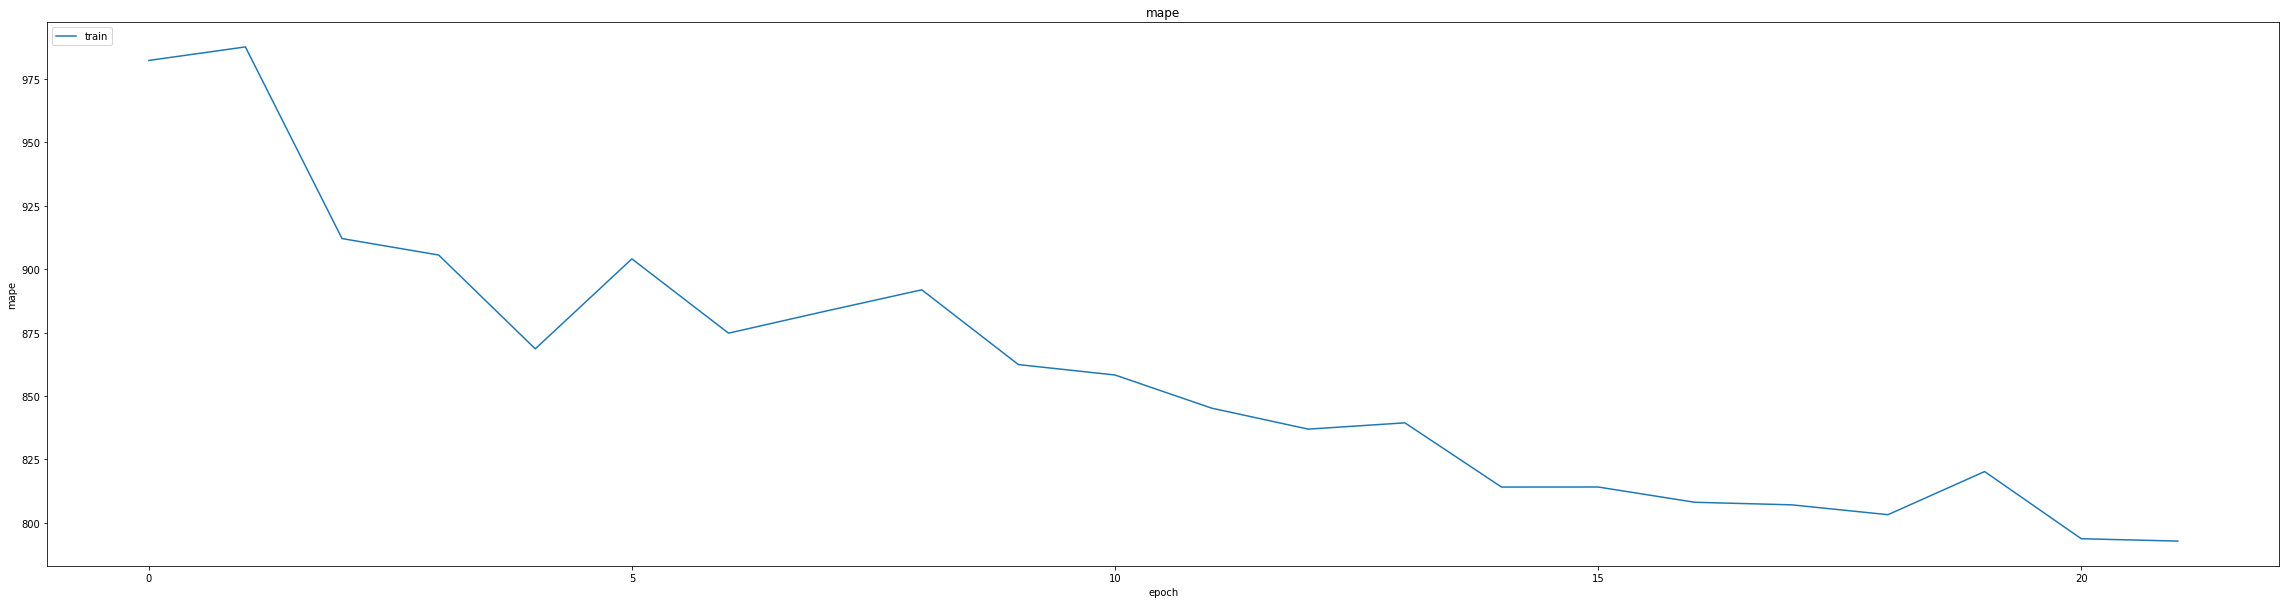

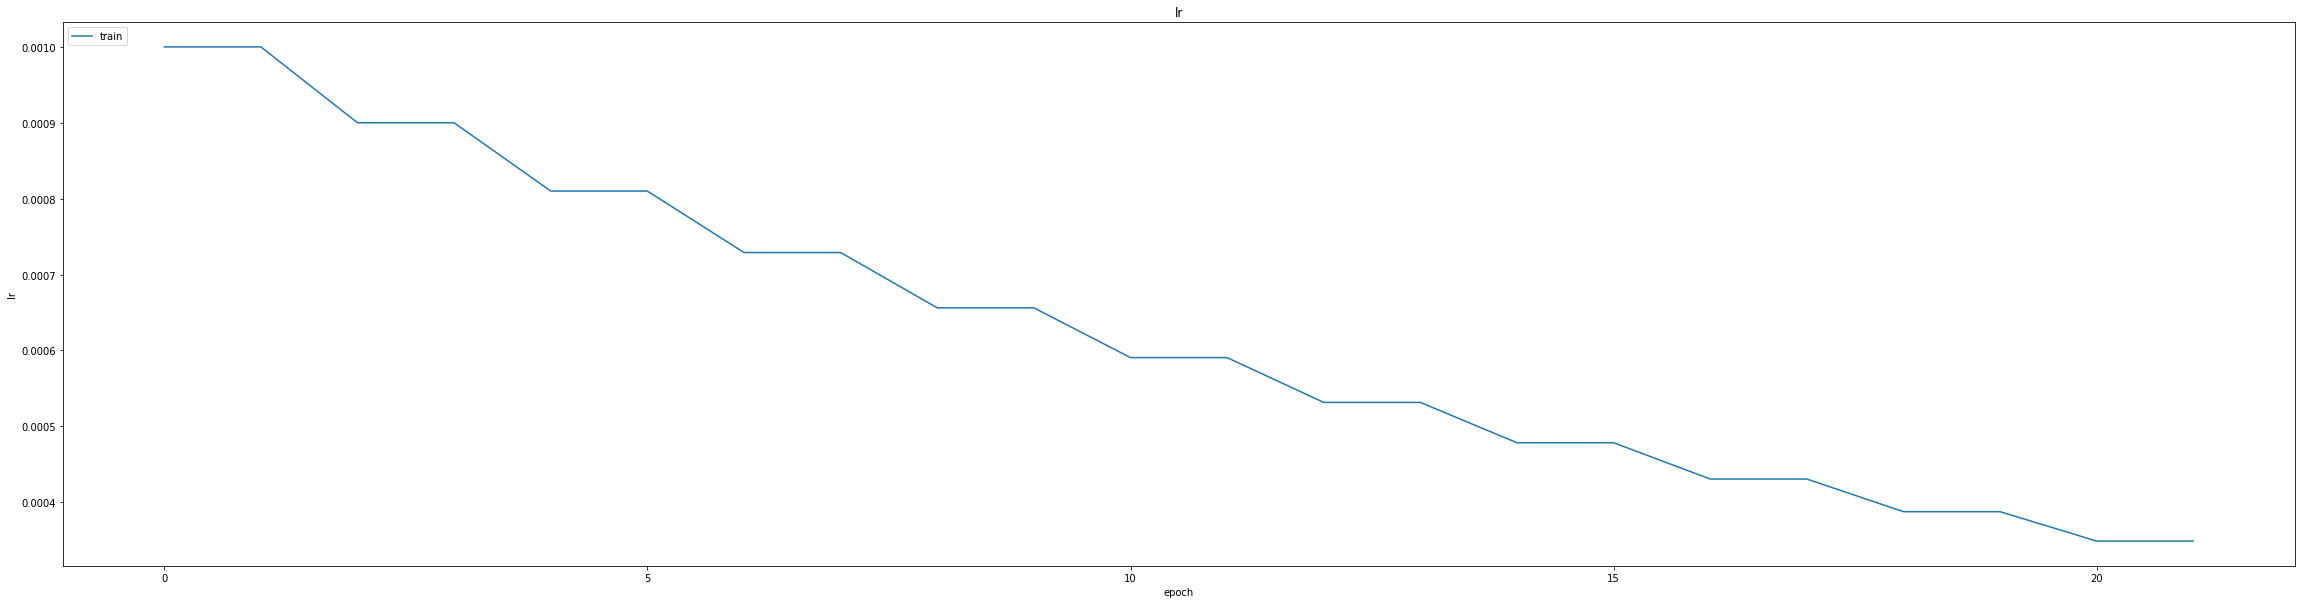

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01934703253209591
0.02243952639400959
234/234 [==============================] - 8s 29ms/step
0.972970877893125


234/234 [==============================] - 7s 30ms/step


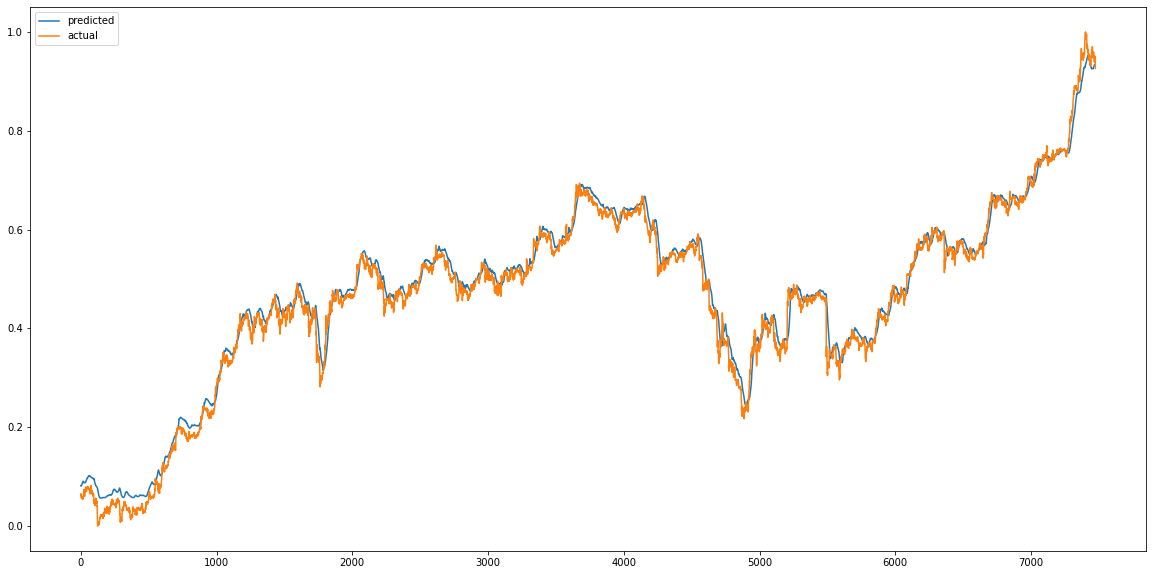

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY15minGRU.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


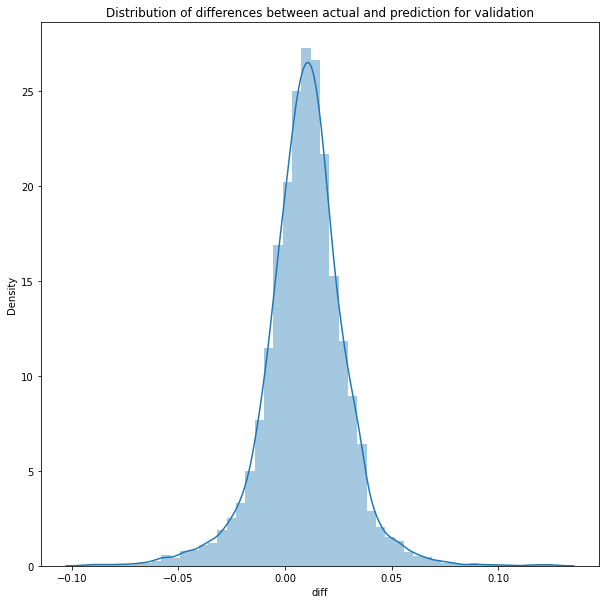

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 7s 29ms/step


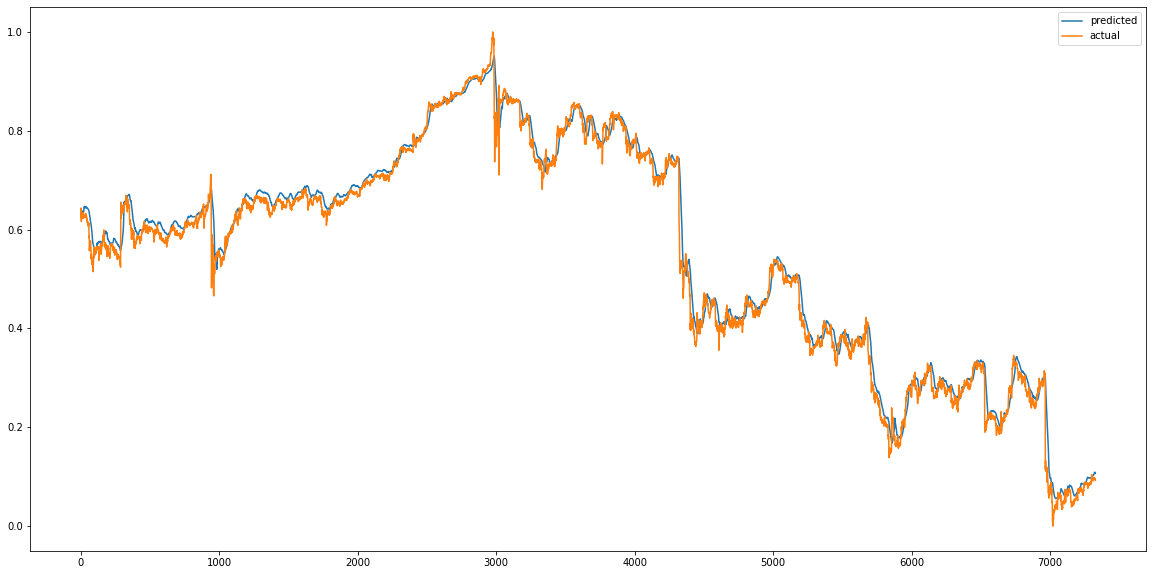

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


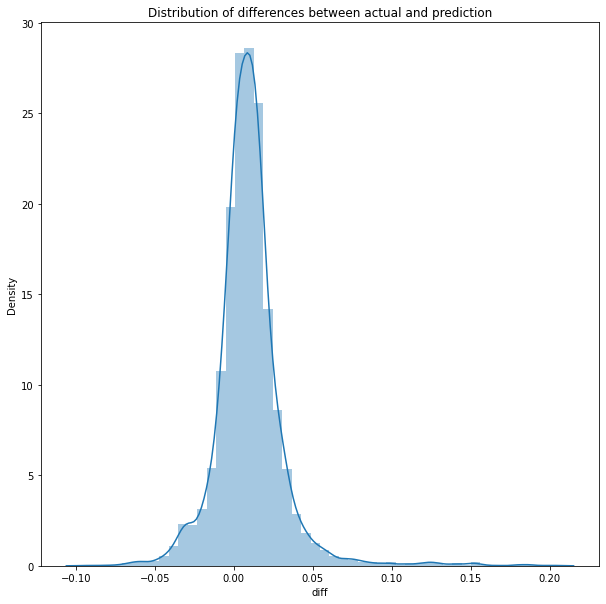

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005771792940534278
MAE :  0.01601955630485066
RMSE  : 0.024024556063607663
229/229 [==============================] - 11s 49ms/step
R2_Score  : 0.9889293043272314


count    7328.000000
mean        0.009801
std         0.021936
min        -0.094892
25%        -0.000354
50%         0.008652
75%         0.017769
max         0.203925
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          164864    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 450.3669 - mae: 3.1355 - mse: 450.3669 - root_mean_squared_error: 21.2219 - mape: 4737.8765
Epoch 1: val_mse improved from inf to 0.11897, saving model to weights.best.hdf5
464/464 [==============================] - 165s 332ms/step - loss: 450.3669 - mae: 3.1355 - mse: 450.3669 - root_mean_squared_error: 21.2219 - mape: 4737.8765 - val_loss: 0.1190 - val_mae: 0.3104 - val_mse: 0.1190 - val_root_mean_squared_error: 0.3449 - val_mape: 24903.3945
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0452 - mae: 0.1406 - mse: 0.0452 - root_mean_squared_error: 0.2126 - mape: 4160.1001
Epoch 2: val_mse improved from 0.11897 to 0.08469, saving model to weights.best.hdf5
464/464 [==============================] - 149s 321ms/step - loss: 0.0452 - mae: 0.1406 - mse: 0.0452 - root_mean_squared_error: 0.2126 - mape: 4160.1001 - val_loss: 0.0847 - val_mae: 0.2589 - val_mse: 0.0847 - val_root_mean_squared_error: 

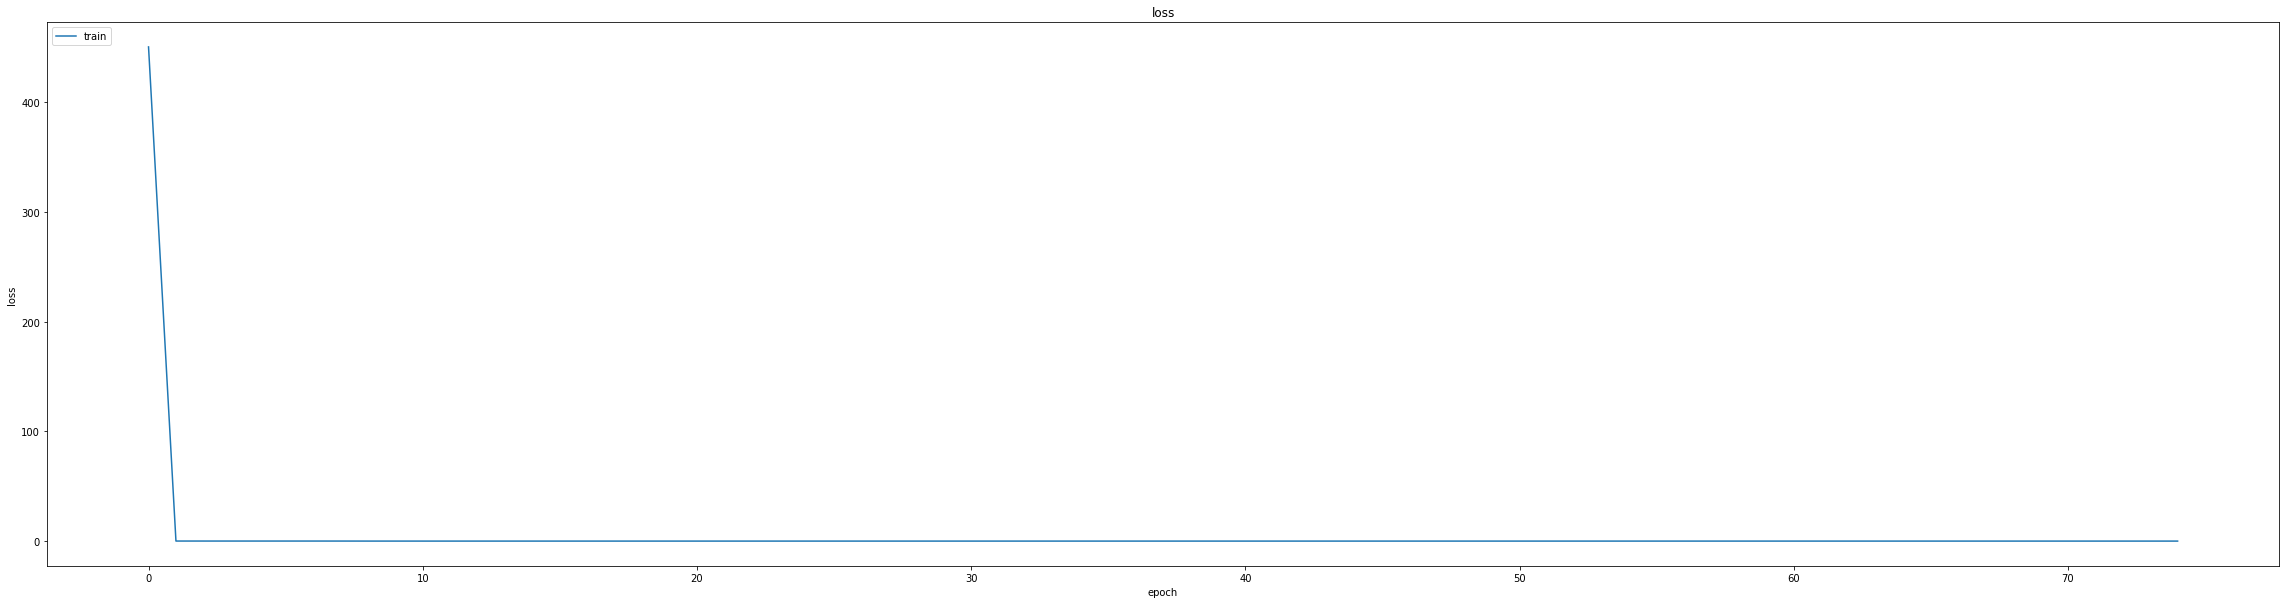

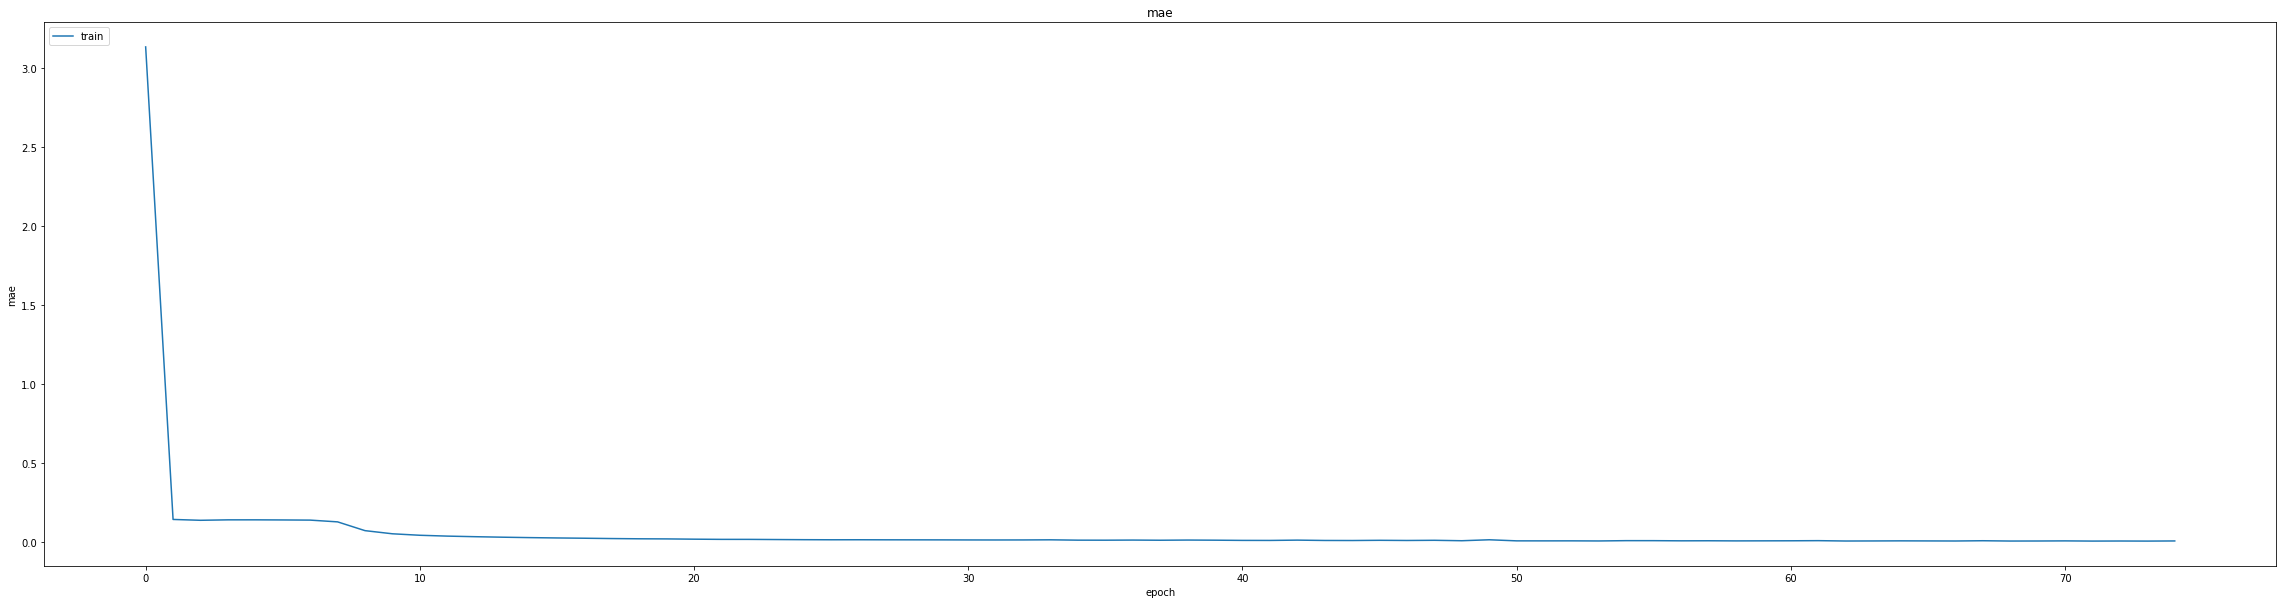

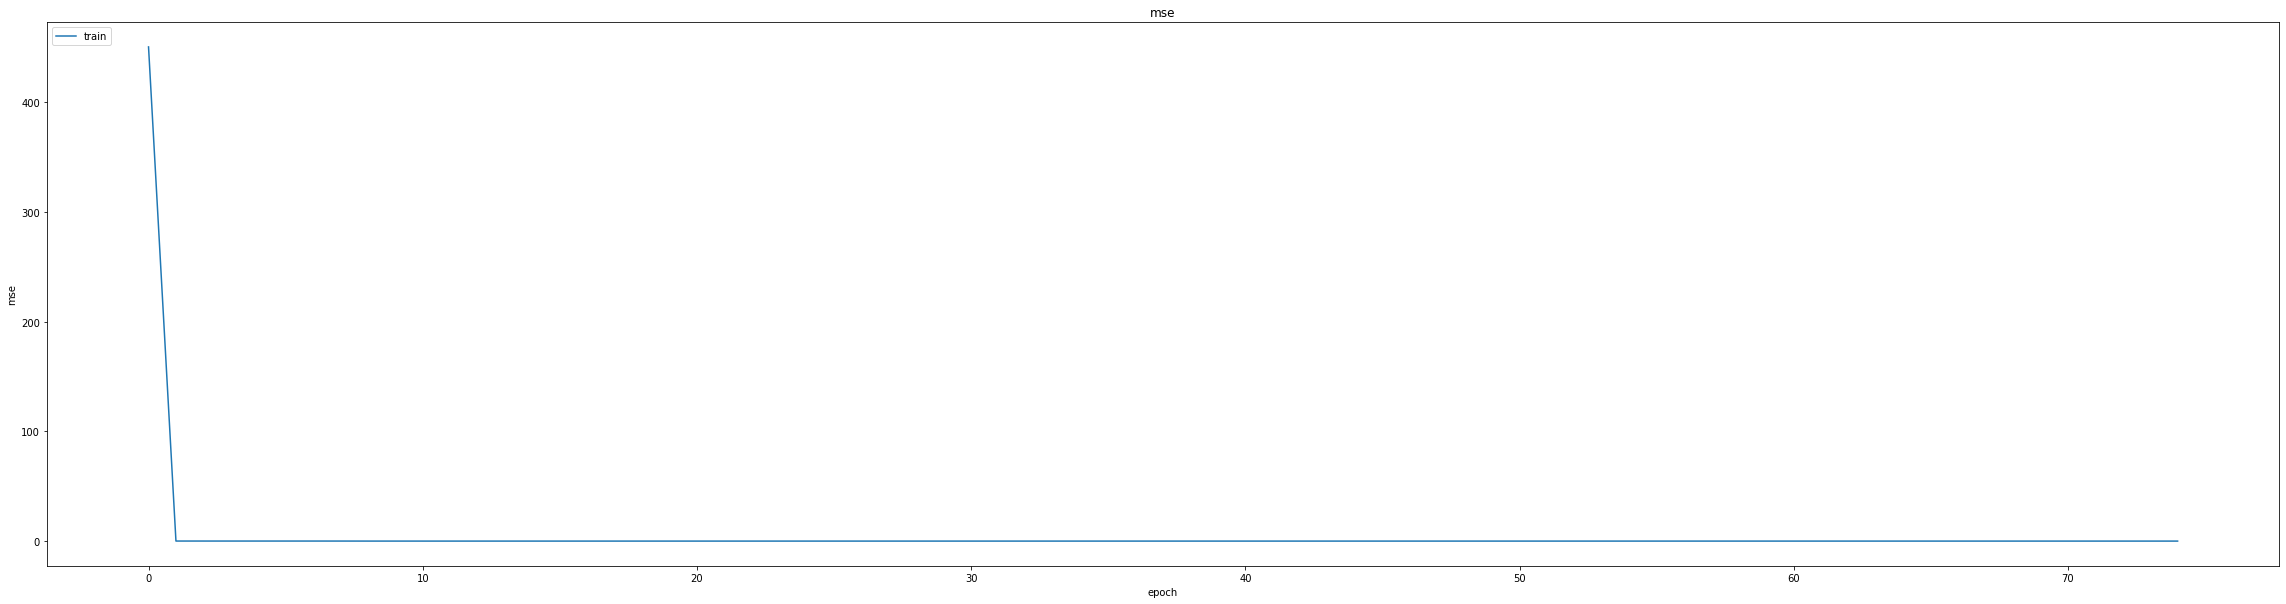

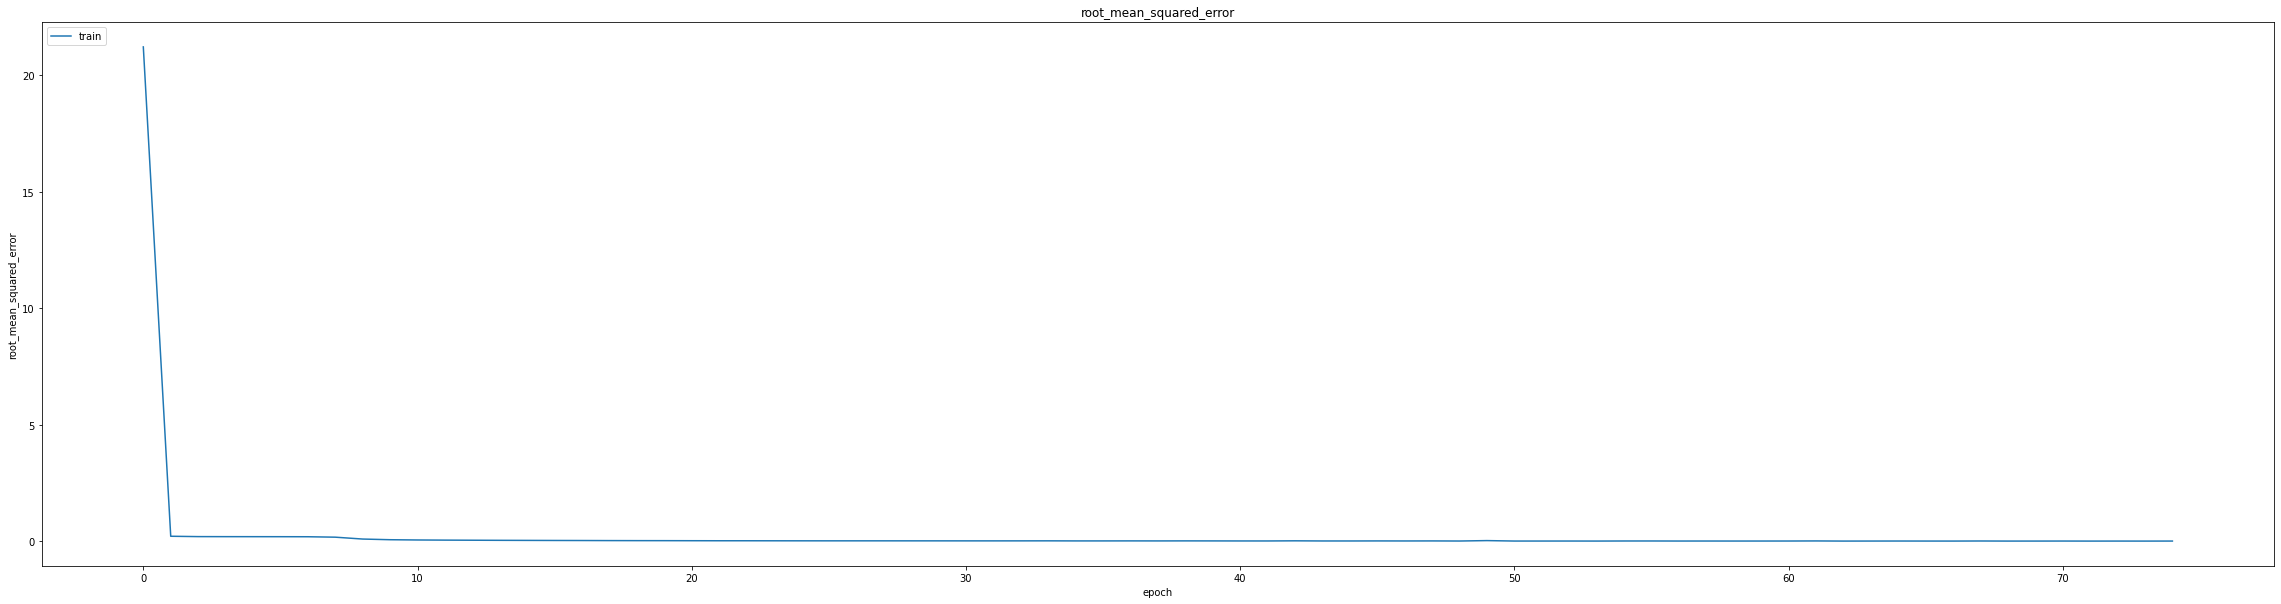

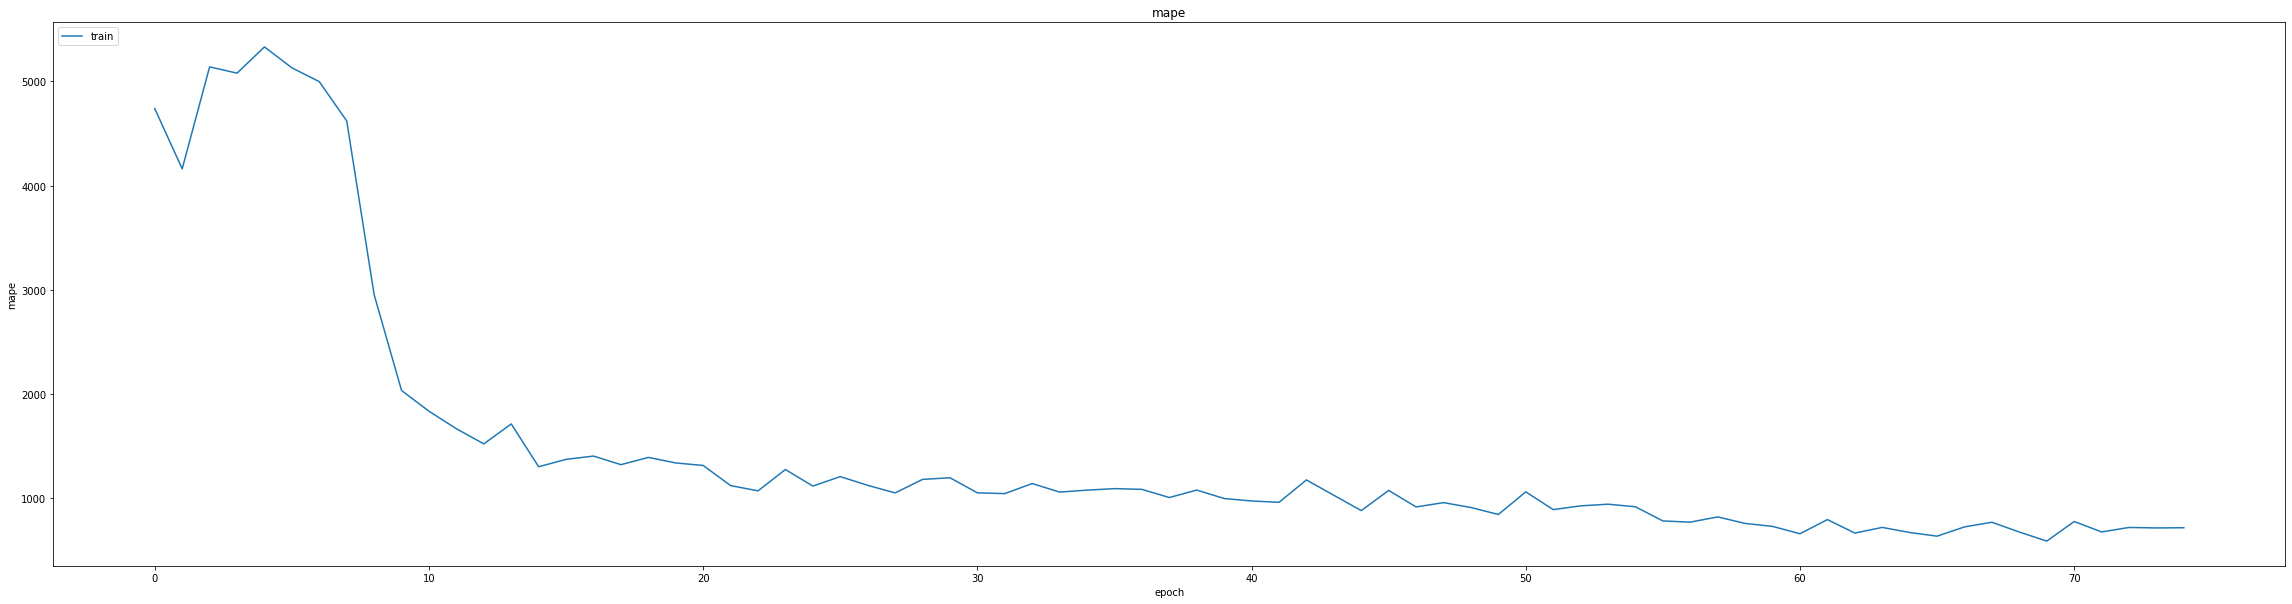

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010798648931086063
0.01503870077431202
234/234 [==============================] - 13s 42ms/step
0.9623382181854693


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0217 - mse: 0.0034 - root_mean_squared_error: 0.0586 - mape: 1826.1217
Epoch 1: val_mse did not improve from 0.00023
464/464 [==============================] - 165s 335ms/step - loss: 0.0034 - mae: 0.0217 - mse: 0.0034 - root_mean_squared_error: 0.0586 - mape: 1826.1217 - val_loss: 6.9623e-04 - val_mae: 0.0243 - val_mse: 6.9623e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 10334.3535 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 9.6164e-05 - mae: 0.0070 - mse: 9.6164e-05 - root_mean_squared_error: 0.0098 - mape: 1066.8700
Epoch 2: val_mse did not improve from 0.00023
464/464 [==============================] - 147s 317ms/step - loss: 9.6164e-05 - mae: 0.0070 - mse: 9.6164e-05 - root_mean_squared_error: 0.0098 - mape: 1066.8700 - val_loss: 8.1298e-04 - val_mae: 0.0268 - val_mse: 8.1298e-04 - val_root_mean_squared_error: 0.0285 - val_mape: 9874.9697 - lr: 0.00

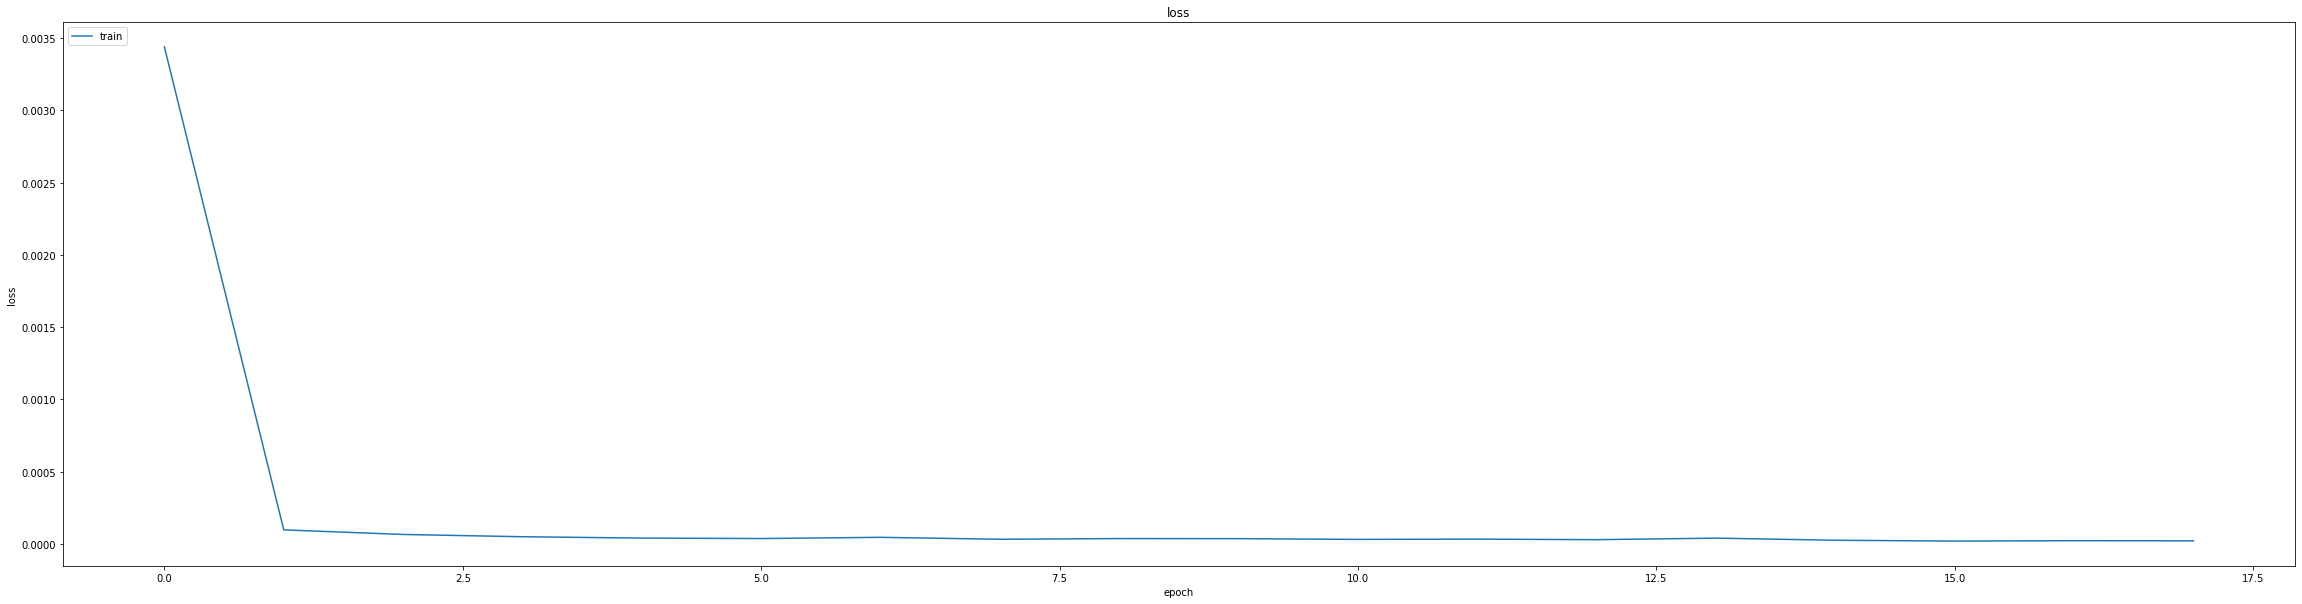

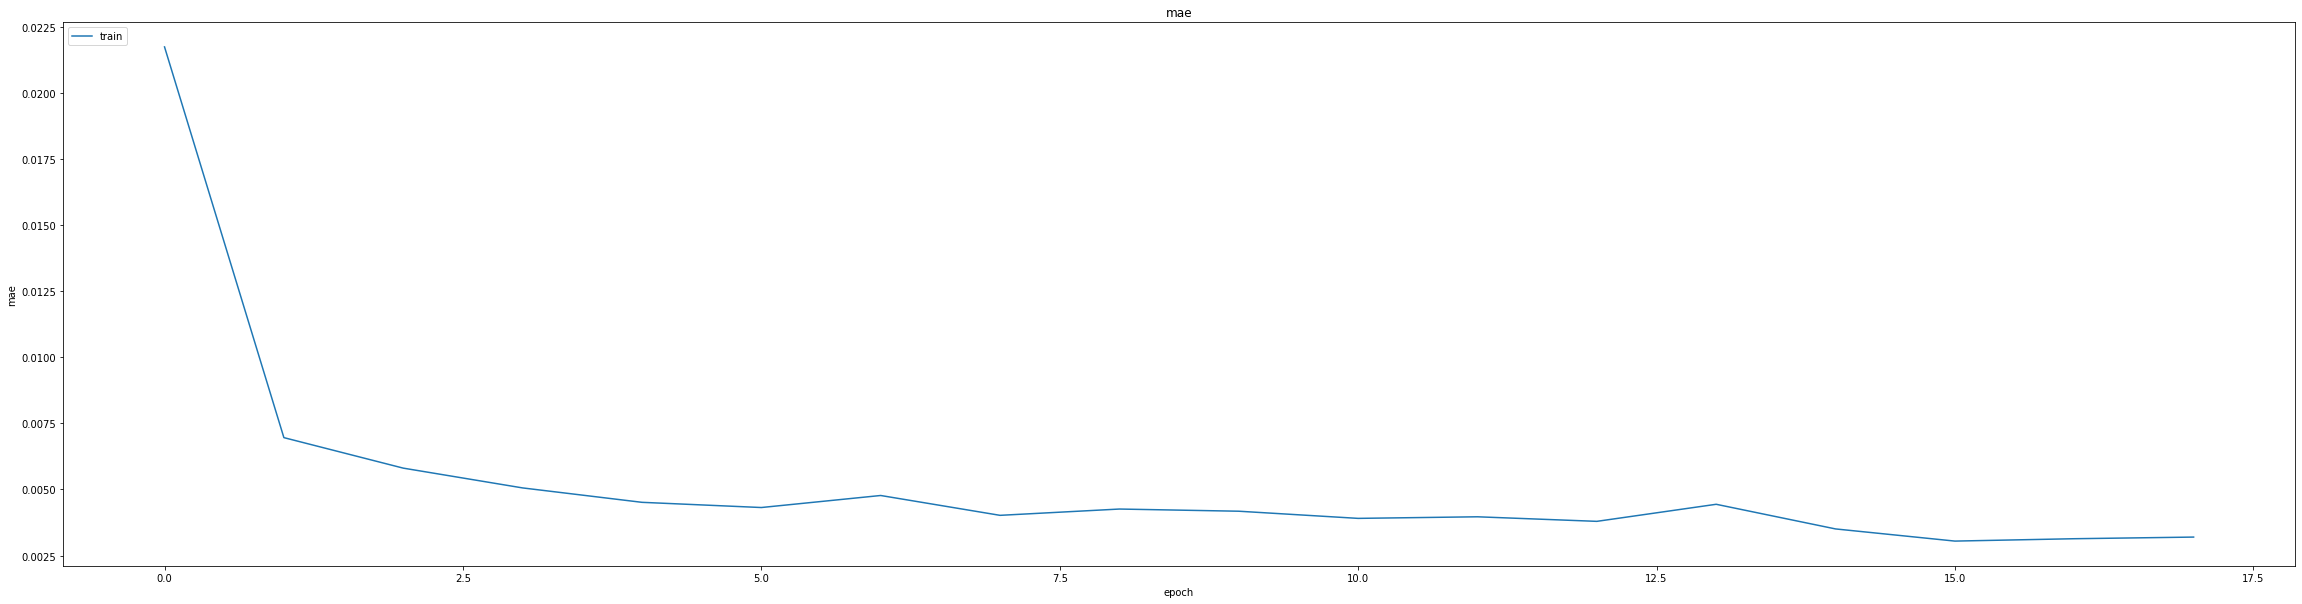

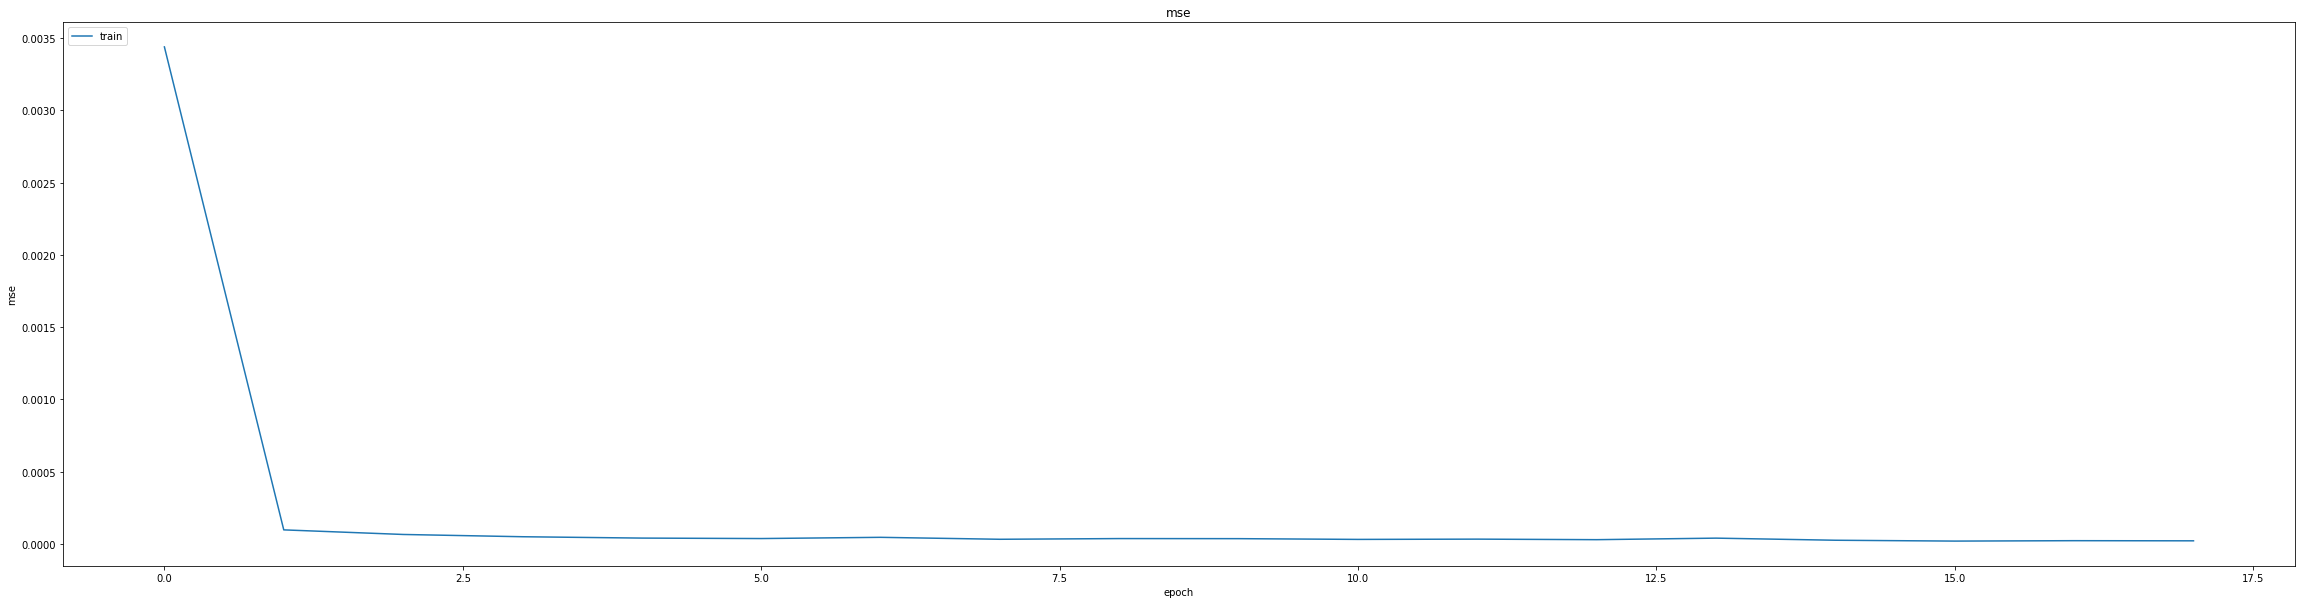

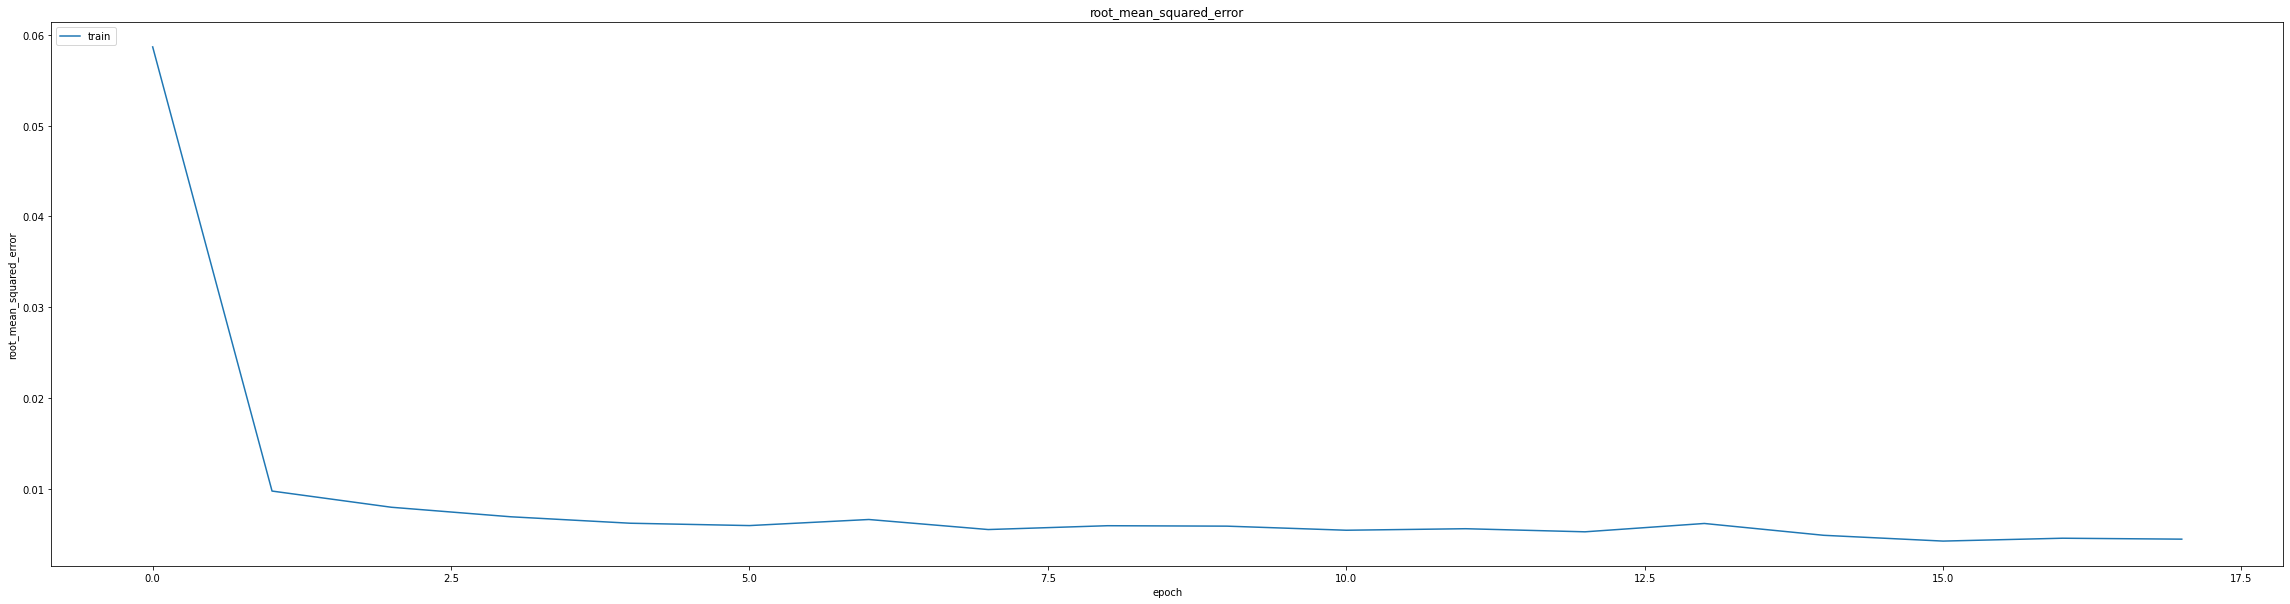

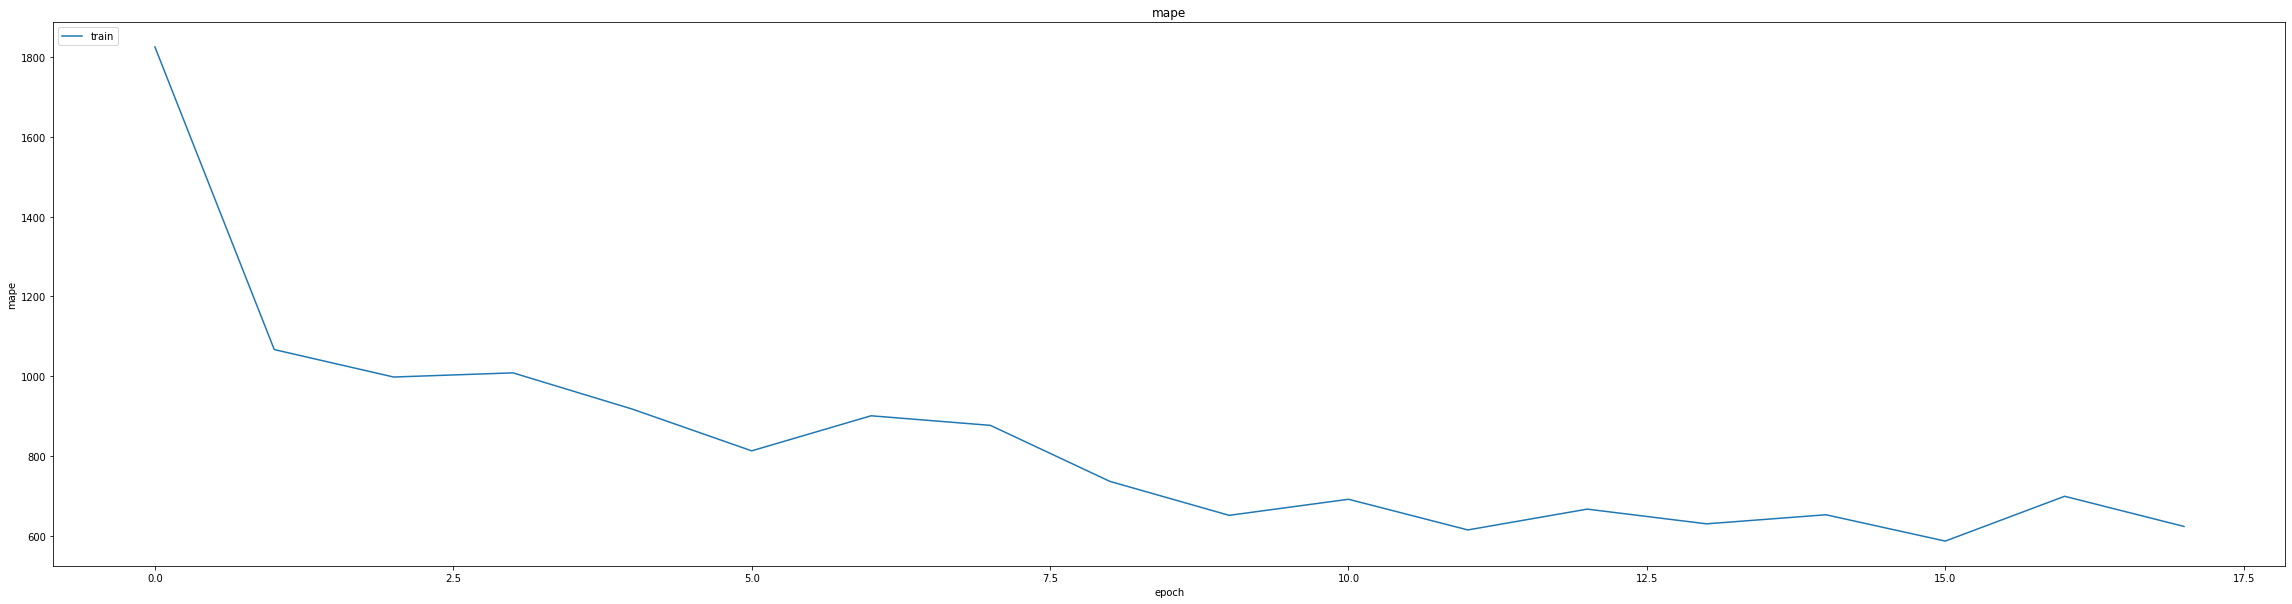

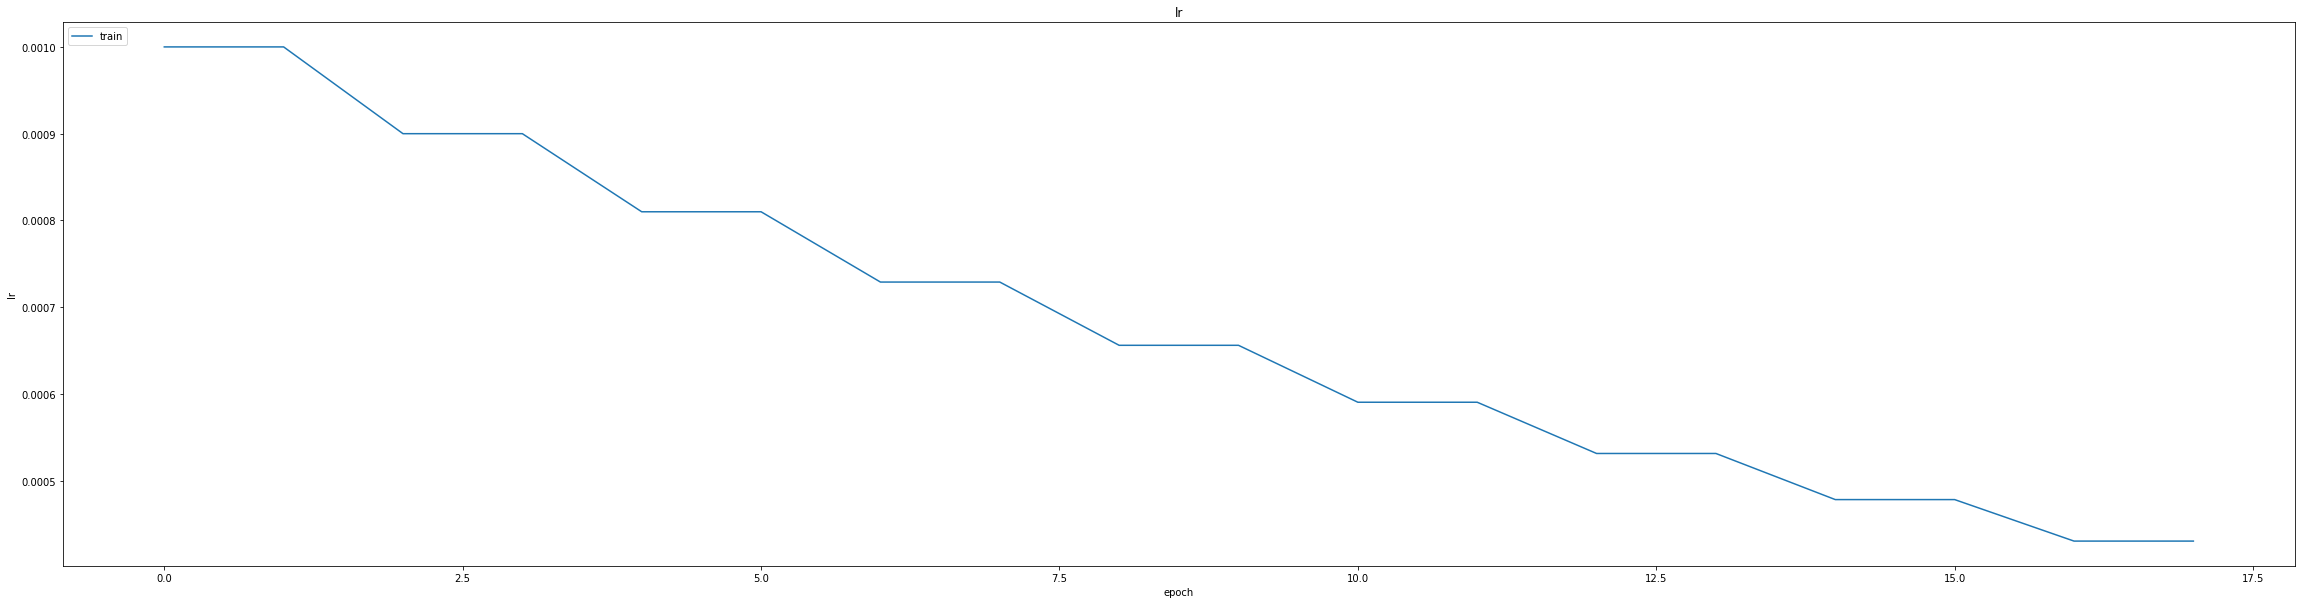

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.022375859320163727
0.024330394342541695
234/234 [==============================] - 24s 90ms/step
0.934503105766486


234/234 [==============================] - 9s 39ms/step


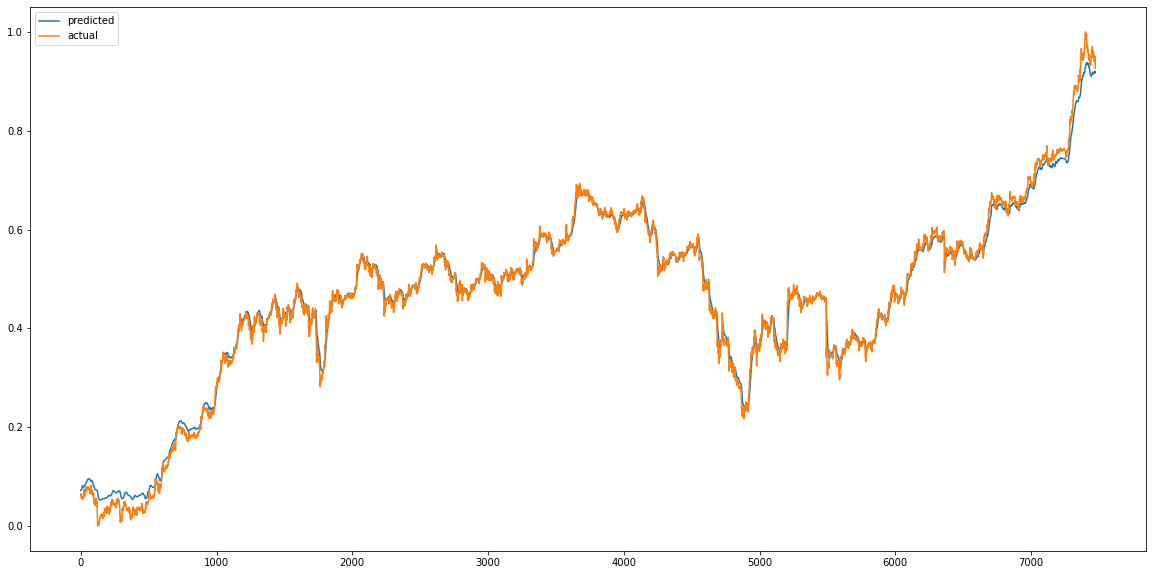

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


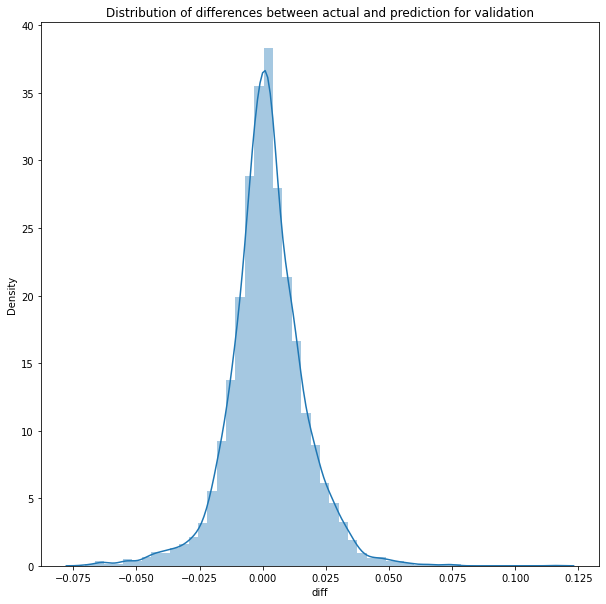

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 40ms/step


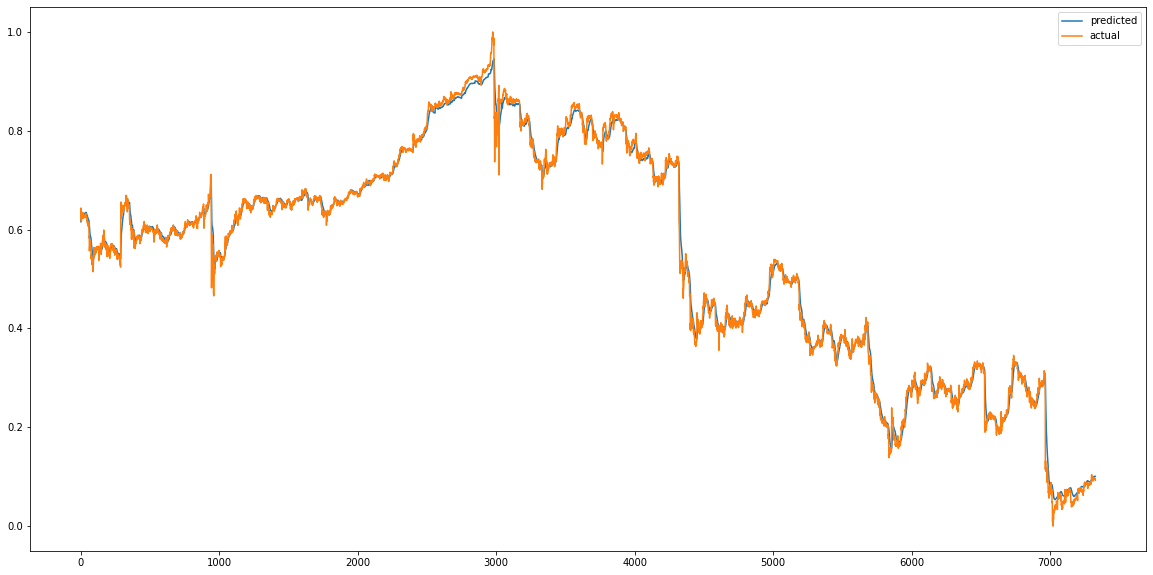

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


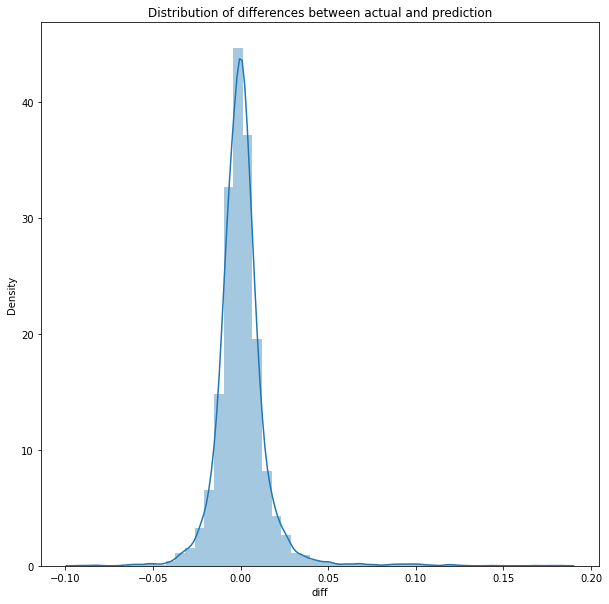

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00021781305903538706
MAE :  0.009085256078150368
RMSE  : 0.014758491082606889
229/229 [==============================] - 9s 40ms/step
R2_Score  : 0.9958221957840879


count    7328.000000
mean        0.000428
std         0.014753
min        -0.092028
25%        -0.006526
50%        -0.000284
75%         0.005724
max         0.182452
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint





checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
print(x_val.shape)
print(x_train.shape)

(7475, 24, 12)
(59383, 24, 12)


In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 378.0099 - mae: 3.0488 - mse: 378.0099 - root_mean_squared_error: 19.4425 - mape: 13799.3418
Epoch 1: val_mse improved from inf to 0.04287, saving model to weights.best.hdf5
464/464 [==============================] - 138s 285ms/step - loss: 378.0099 - mae: 3.0488 - mse: 378.0099 - root_mean_squared_error: 19.4425 - mape: 13799.3418 - val_loss: 0.0429 - val_mae: 0.1505 - val_mse: 0.0429 - val_root_mean_squared_error: 0.2070 - val_mape: 73711.4688
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0747 - mae: 0.2442 - mse: 0.0747 - root_mean_squared_error: 0.2733 - mape: 7427.9062
Epoch 2: val_mse improved from 0.04287 to 0.03658, saving model to weights.best.hdf5
464/464 [==============================] - 132s 284ms/step - loss: 0.0747 - mae: 0.2442 - mse: 0.0747 - root_mean_squared_error: 0.2733 - mape: 7427.9062 - val_loss: 0.0366 - val_mae: 0.1474 - val_mse: 0.0366 - val_root_mean_squared_error

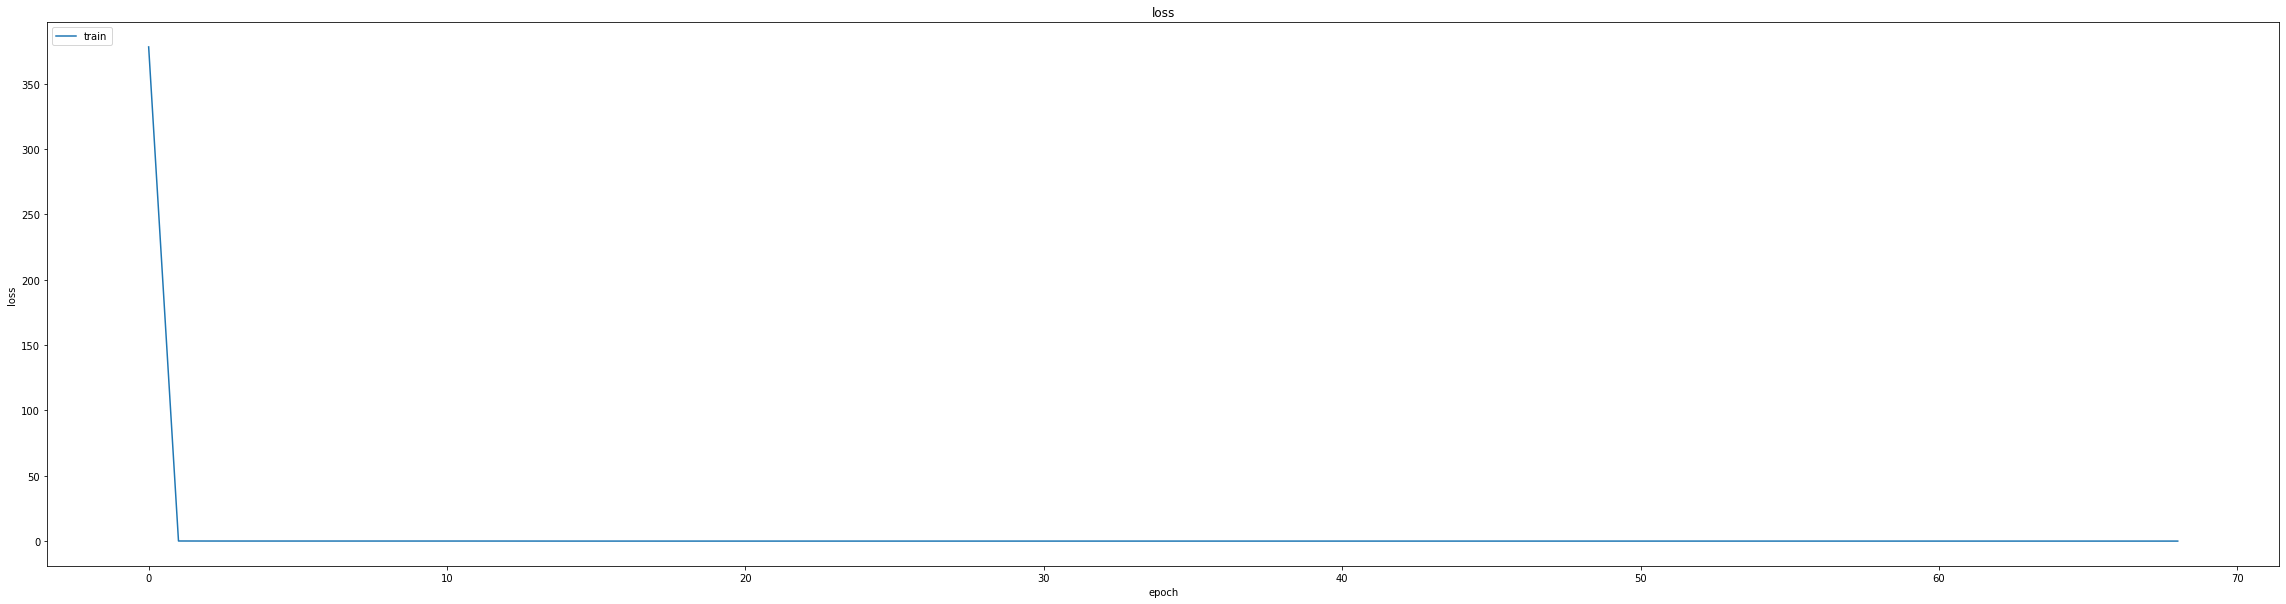

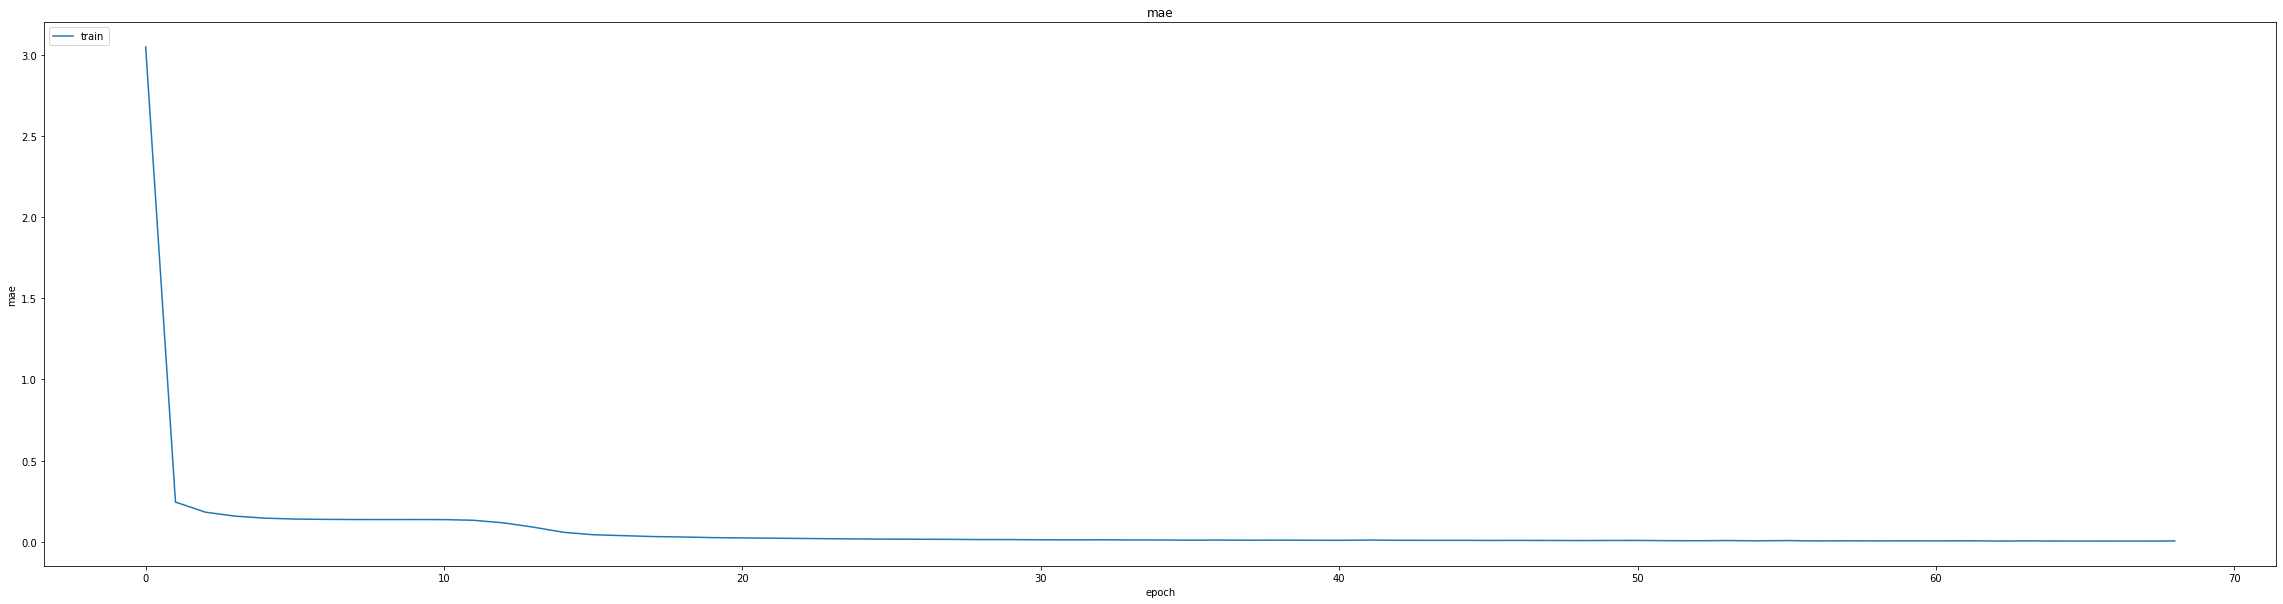

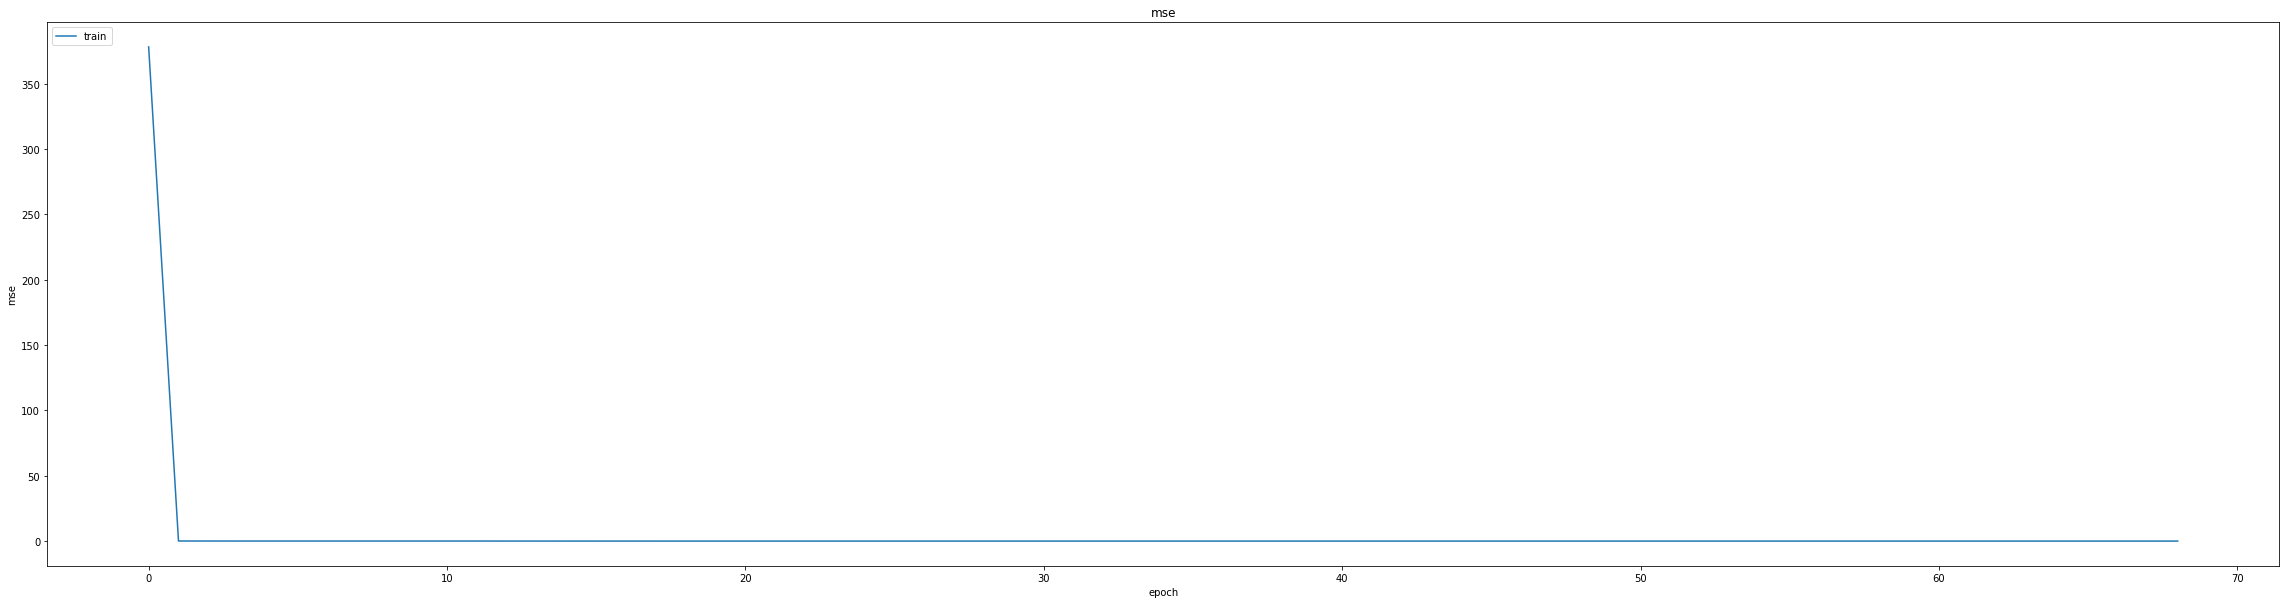

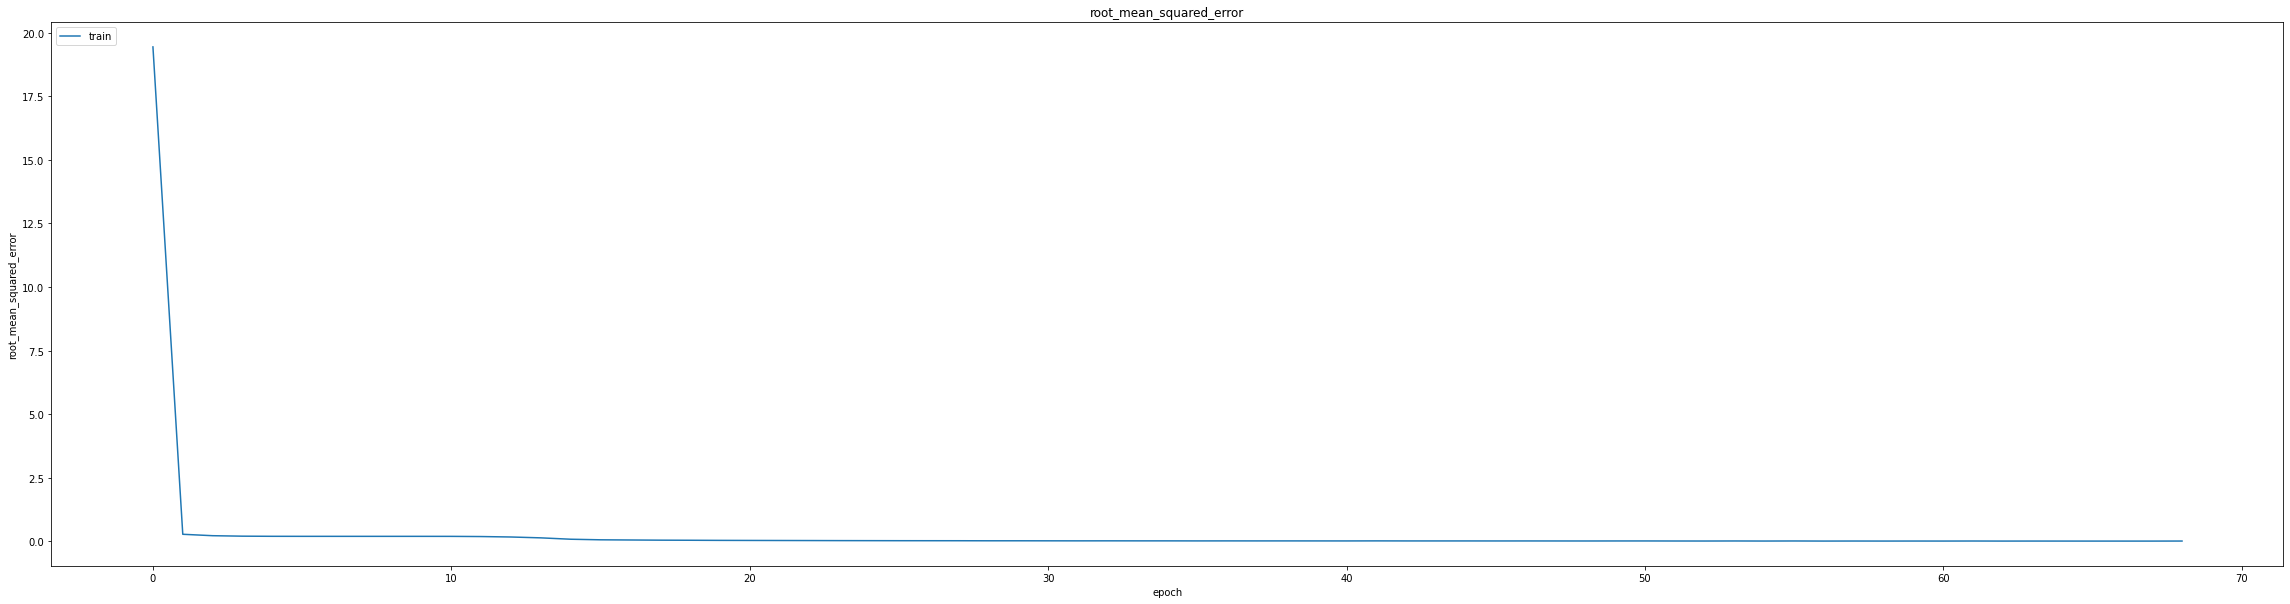

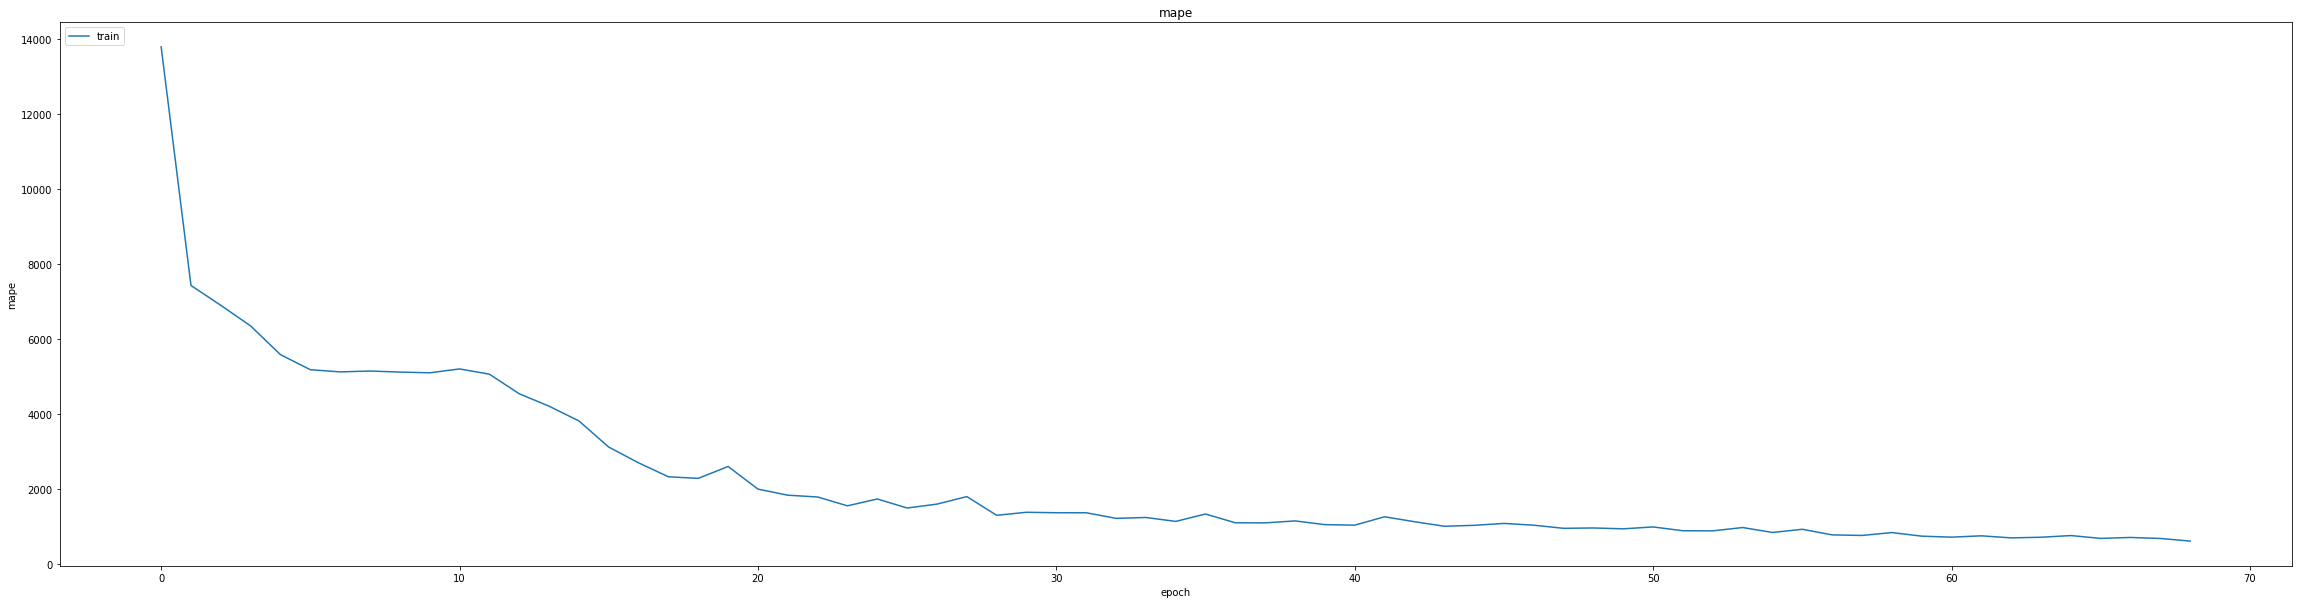

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)


0.016880199313163757
0.0226951502263546
234/234 [==============================] - 10s 37ms/step
0.9388529870572864


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]
Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0230 - mse: 0.0029 - root_mean_squared_error: 0.0540 - mape: 3483.2100
Epoch 1: val_mse did not improve from 0.00052
464/464 [==============================] - 143s 296ms/step - loss: 0.0029 - mae: 0.0230 - mse: 0.0029 - root_mean_squared_error: 0.0540 - mape: 3483.2100 - val_loss: 6.3033e-04 - val_mae: 0.0194 - val_mse: 6.3033e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 10166.2041 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.5353e-04 - mae: 0.0090 - mse: 1.5353e-04 - root_mean_squared_error: 0.0124 - mape: 1152.4291
Epoch 2: val_mse did not improve from 0.00052
464/464 [==============================] - 130s 281ms/step - loss: 1.5353e-04 - mae: 0.0090 - mse: 1.5353e-04 - root_mean_squared_error: 0.0124 - mape: 1152.4291 - val_loss: 9.6436e-04 - val_mae: 0.0256 - val_mse: 9.6436e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 9161.7158 - lr: 0.00

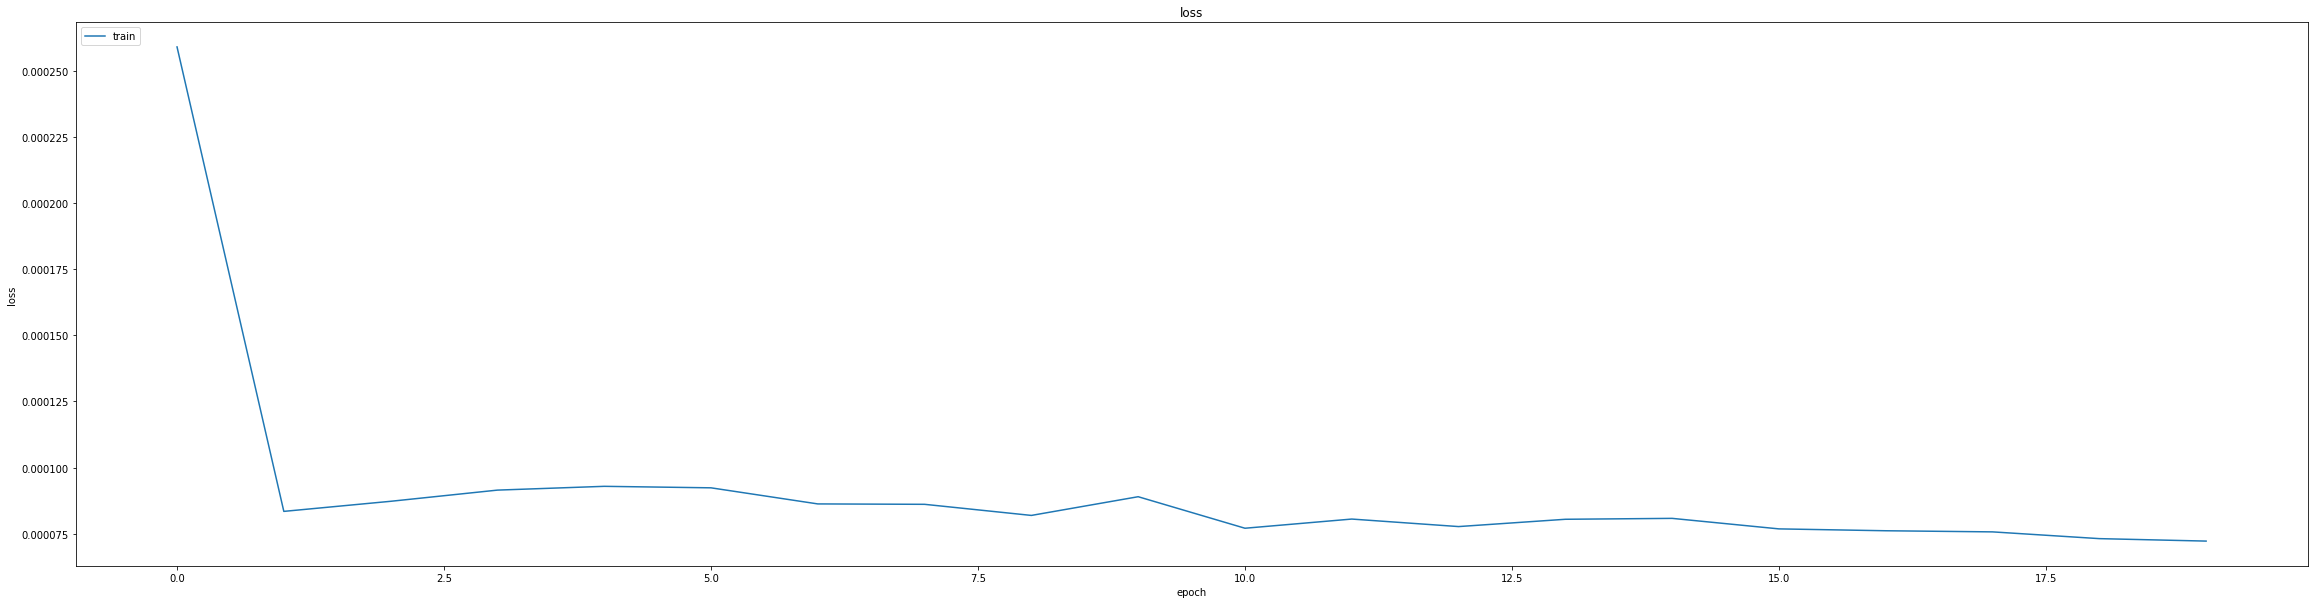

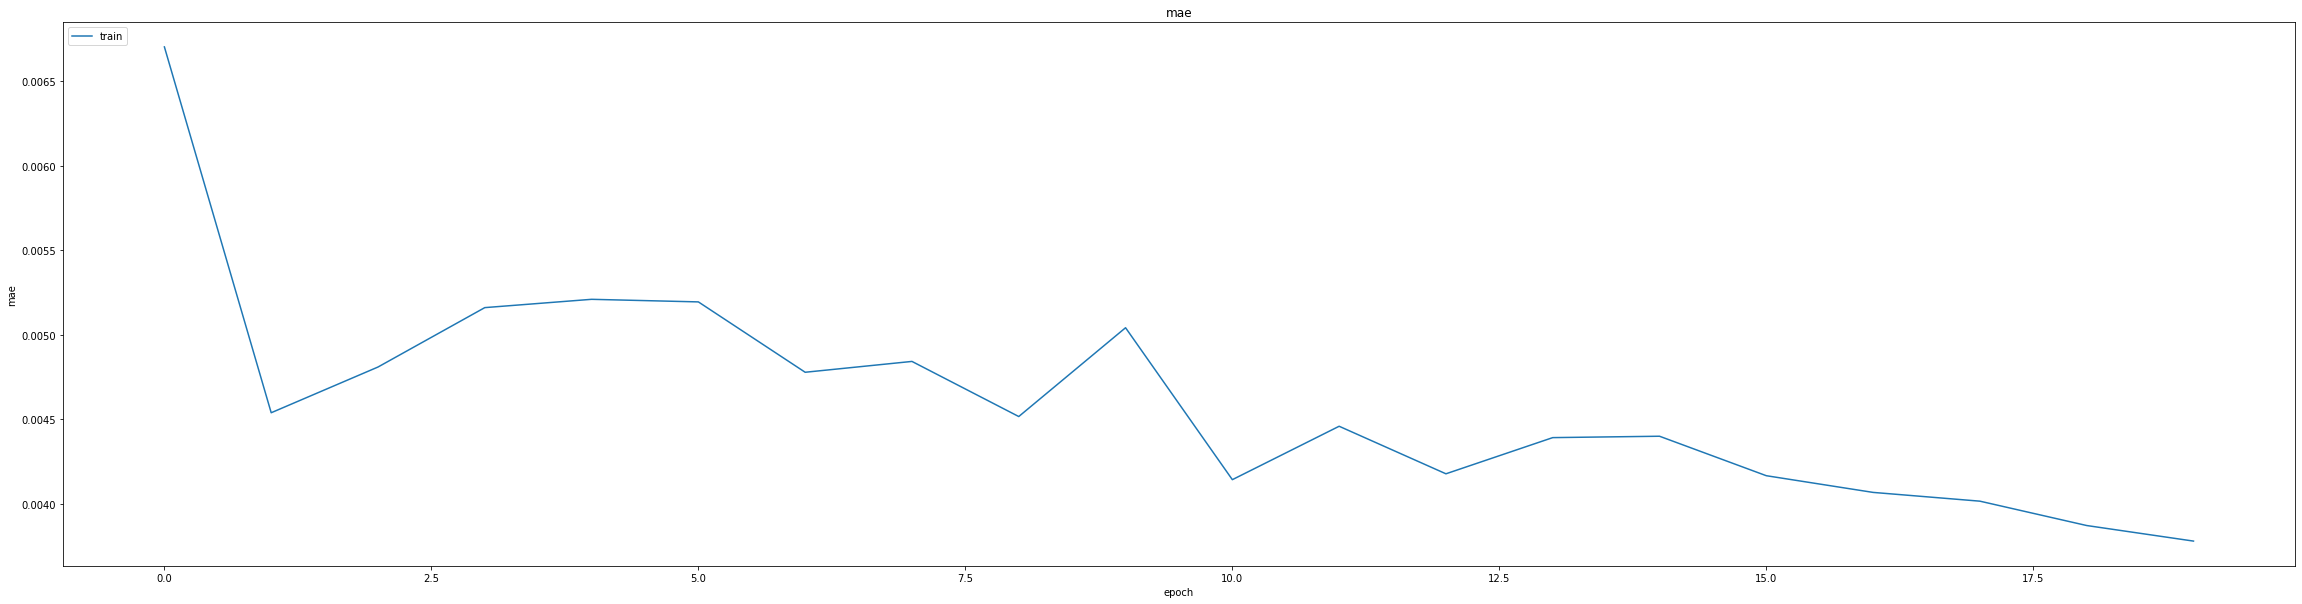

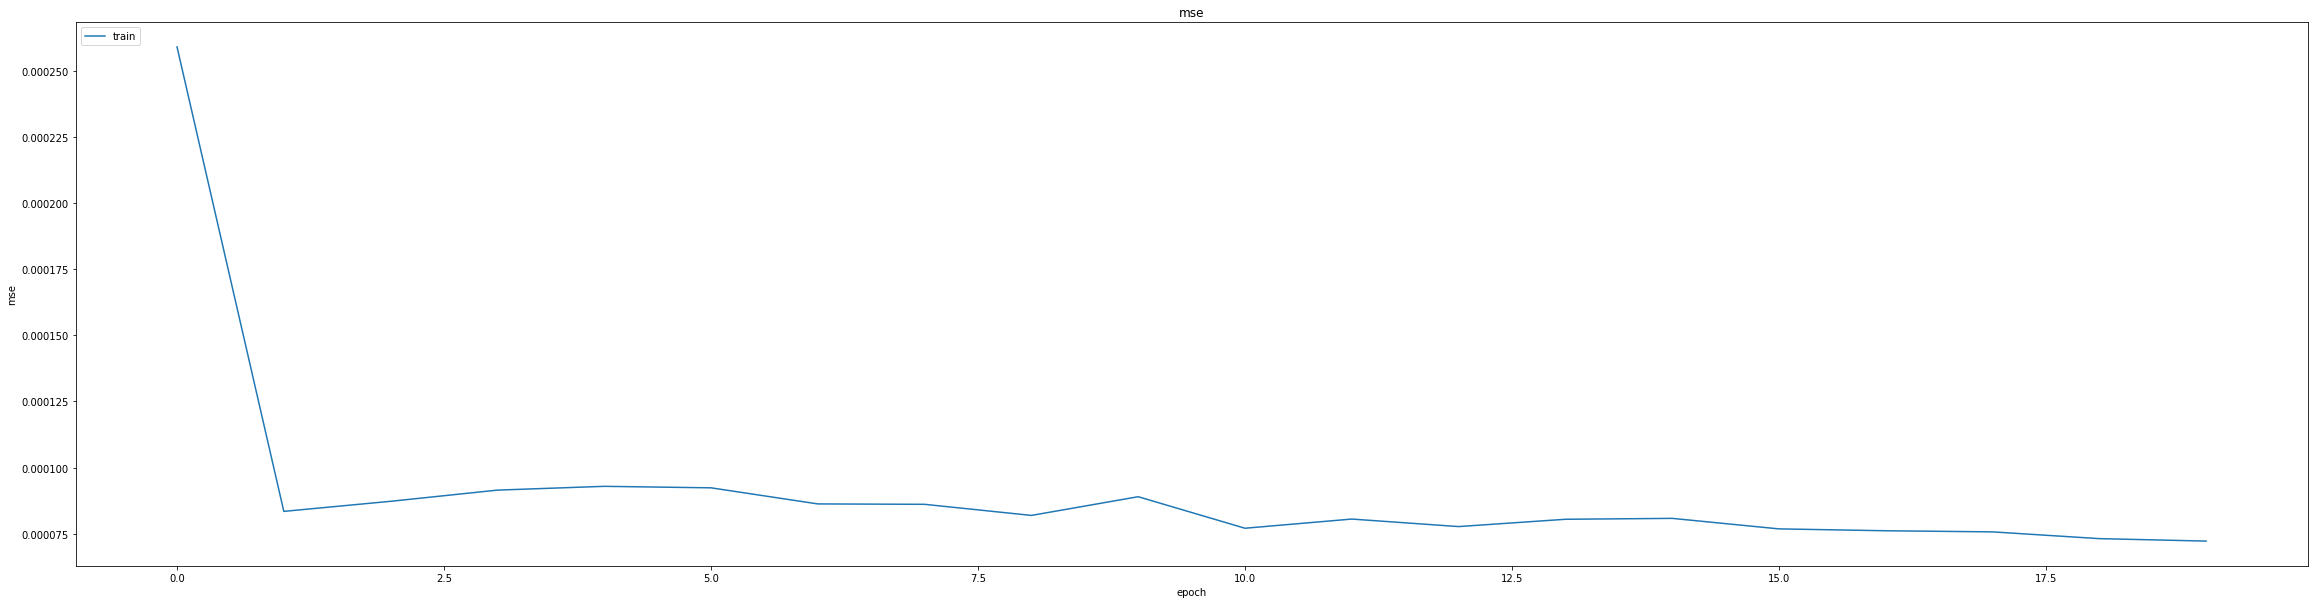

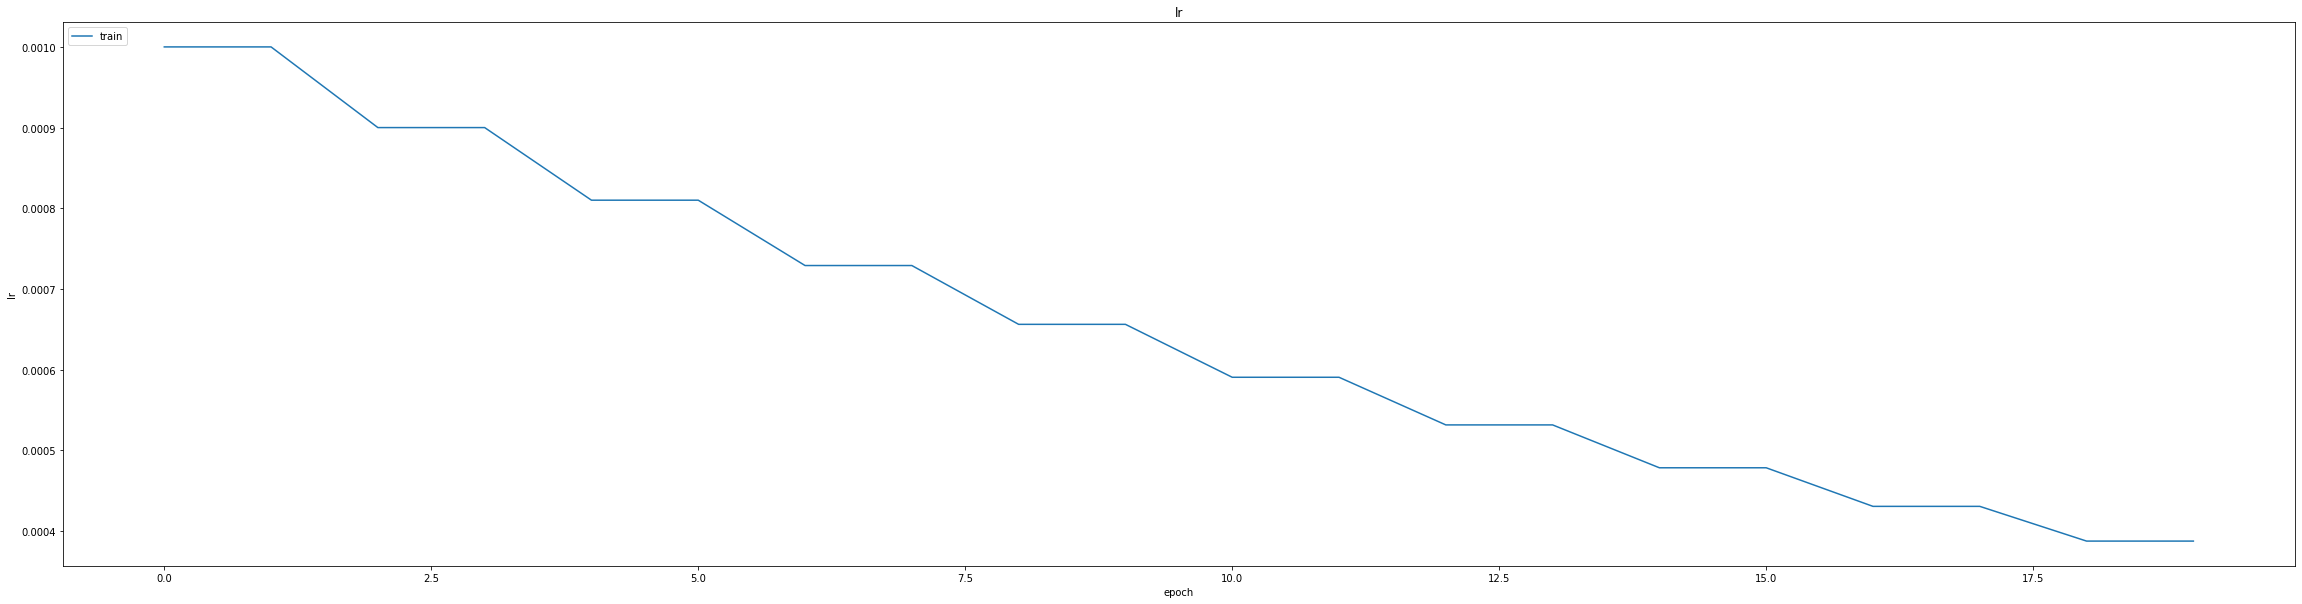

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
print(min(histroy.history['var_mape']))
r2_scr = R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.001994288293644786

In [ ]:
model.load_weights("weights.best.hdf5")

464/464 [==============================] - 11s 24ms/step


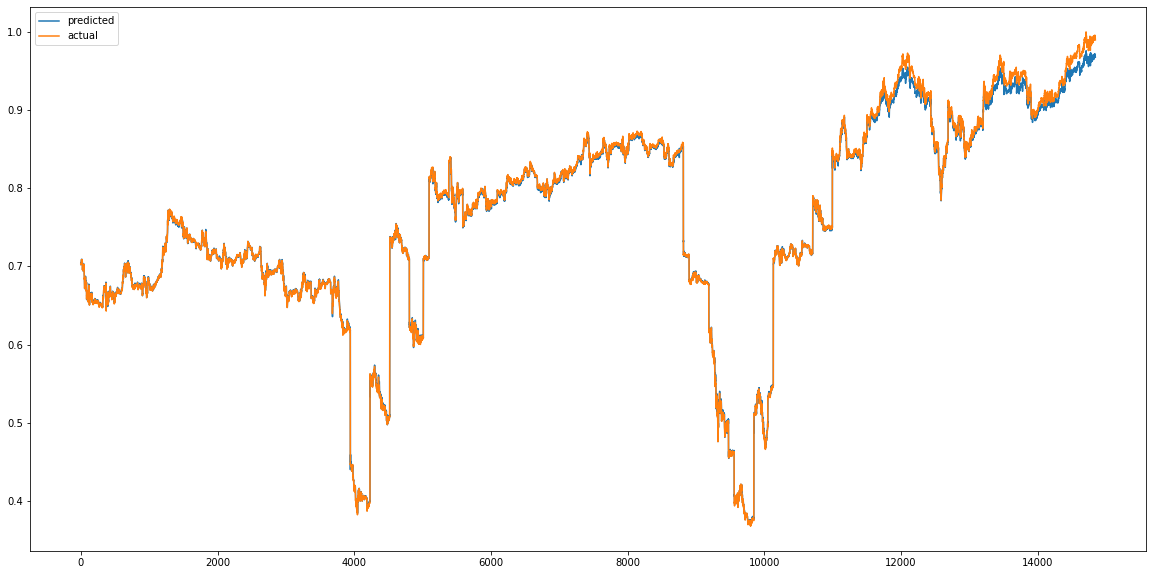

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


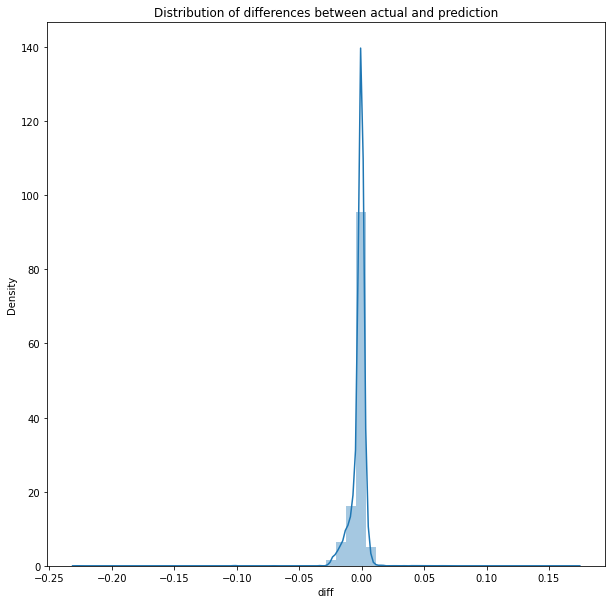

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
predictions['diff'].describe()

MSE :  4.746147856034065e-05
MAE :  0.003565254386337042


count    14843.000000
mean        -0.002222
std          0.006521
min         -0.228663
25%         -0.003217
50%         -0.000889
75%          0.000662
max          0.171868
Name: diff, dtype: float64